## Setup

In [1]:
source("/path/to/the/project/02_notebooks/00_setup.r")

In [2]:
source("https://raw.githubusercontent.com/HerpelinckT/geneset-modulescoring/main/modulescoring/geneset_modulescoring.R")

In [3]:
p_load("ggplot2", "dplyr", "ggpubr", "ggbreak", "gee", "ggeffects", "DESeq2", "MuMIn", "ggvenn", "enrichR", install = FALSE)

In [4]:
ggplotRegression_ccl4 <- function (fit) {
ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1], color = names(fit$model)[2])) + 
  geom_point(shape = 16, size = 5, alpha = 0.8, show.legend = FALSE) +
  stat_smooth(method = "lm", col = "#5e2dbb") +
  labs(title = paste("Adj R2 = ",signif(summary(fit)$adj.r.squared, 5),
                     "Intercept =",signif(fit$coef[[1]],5 ),
                     " Slope =",signif(fit$coef[[2]], 5),
                     " P =",signif(summary(fit)$coef[2,4], 5))) +
                     theme_minimal() +
  scale_color_gradient(low = "#708090", high = "#063852")
}

In [5]:
wgcna_genes <- read.csv("03_outputs/07/all_genes_traits_value.csv", row.names = 1)
biotmle_genes <- read.csv("03_outputs/06/top200_genes_tmle.csv")

In [6]:
metadata <- read.csv("2022_08_12_CDL_regression_sample_annotation.csv", row.names = 1)
dds <- readRDS("03_outputs/03/dds_object_batch_group_wald.rds")

In [65]:
remove <- c("Vmn2r3", "Vmn2r4", "Vmn2r2", "Vmn2r-ps11", "Gm17767", "Vmn2r1", "Vmn2r5", "Gm19845", "H2-Eb1", "H2-Ob", 
            "D630003M21Rik", "H2-Aa", "H2-Ab1", "Gm7609", "Fam163b", "Fam177a", "Fam177a2", "Fam180a", "BC002059", "D630039A03Rik", 
            "Gm4841", "0610040J01Rik", "Epb41l4b", "6430548M08Rik", "Gm15645", "Fam135a", "Gm5088") 

In [66]:
biotmle_genes <- biotmle_genes %>% dplyr::filter(!reg %in% remove) %>% dplyr::filter(!cir %in% remove) %>% dplyr::filter(!pp %in% remove) %>% dplyr::filter(!cpa %in% remove)

In [67]:
wgcna_genes_pp_pos <- wgcna_genes %>% arrange(p.GS.PP) %>% filter(p.GS.PP < 0.05) %>% top_frac(.1, GS.PP) %>% filter(!gene %in% remove) 
wgcna_genes_pp_neg <- wgcna_genes %>% arrange(p.GS.PP) %>% filter(p.GS.PP < 0.05) %>% top_frac(-.1, GS.PP) %>% filter(!gene %in% remove)
wgcna_genes_pp <- merge(wgcna_genes_pp_pos, wgcna_genes_pp_neg, all = TRUE)

wgcna_genes_cpa_pos <- wgcna_genes %>% arrange(p.GS.CPA) %>% filter(p.GS.CPA < 0.05) %>% top_frac(.1, GS.CPA) %>% filter(!gene %in% remove)
wgcna_genes_cpa_neg <- wgcna_genes %>% arrange(p.GS.CPA) %>% filter(p.GS.CPA < 0.05) %>% top_frac(-.1, GS.CPA) %>% filter(!gene %in% remove)
wgcna_genes_cpa <- merge(wgcna_genes_cpa_pos, wgcna_genes_cpa_neg, all = TRUE)

wgcna_genes_cir_pos <- wgcna_genes %>% arrange(p.GS.Cirrhosis) %>% filter(p.GS.Cirrhosis < 0.05) %>% top_frac(.1, GS.Cirrhosis) %>% filter(!gene %in% remove)
wgcna_genes_cir_neg <- wgcna_genes %>% arrange(p.GS.Cirrhosis) %>% filter(p.GS.Cirrhosis < 0.05) %>% top_frac(-.1, GS.Cirrhosis) %>% filter(!gene %in% remove)
wgcna_genes_cir <- merge(wgcna_genes_cir_pos, wgcna_genes_cir_neg, all = TRUE)

wgcna_genes_reg_pos <- wgcna_genes %>% arrange(p.GS.Regression) %>% filter(p.GS.Regression < 0.05) %>% top_frac(.1, GS.Regression) %>% filter(!gene %in% remove)
wgcna_genes_reg_neg <- wgcna_genes %>% arrange(p.GS.Regression) %>% filter(p.GS.Regression < 0.05) %>% top_frac(-.1, GS.Regression) %>% filter(!gene %in% remove)
wgcna_genes_reg <- merge(wgcna_genes_reg_pos, wgcna_genes_reg_neg, all = TRUE)

In [68]:
i_pp <- intersect(biotmle_genes$pp, wgcna_genes_pp$gene)
i_cpa <- intersect(biotmle_genes$cpa, wgcna_genes_cpa$gene)
i_cir <- intersect(biotmle_genes$cir, wgcna_genes_cir$gene)
i_reg <- intersect(biotmle_genes$reg, wgcna_genes_reg$gene)

i_pp <- setdiff(i_pp, remove)
i_cpa <- setdiff(i_cpa, remove)
i_cir <- setdiff(i_cir, remove)
i_reg <- setdiff(i_reg, remove)

## Venn diagram

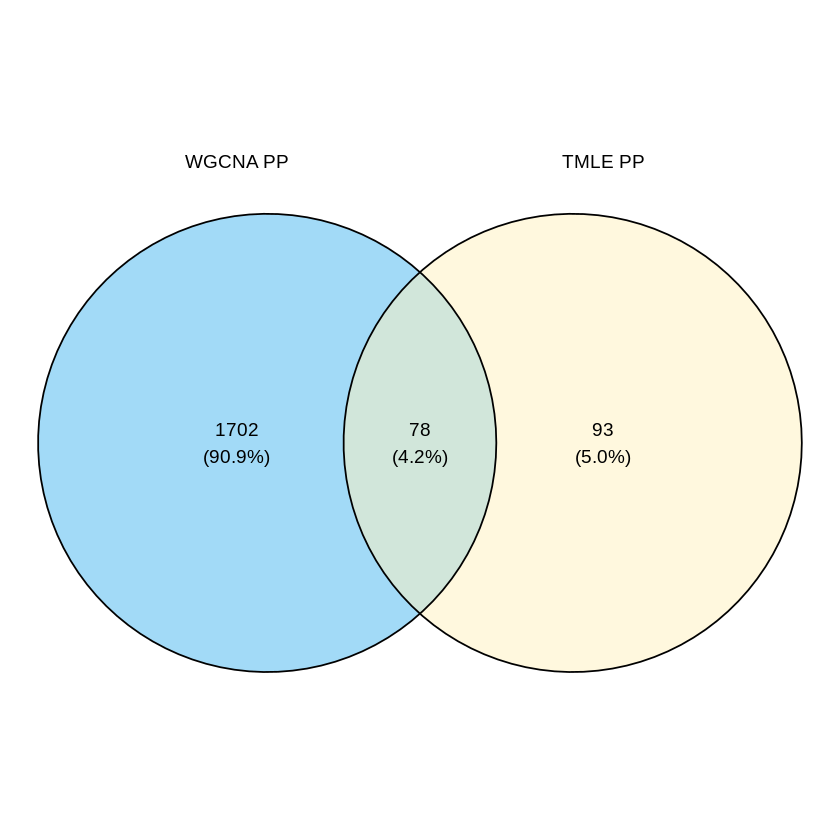

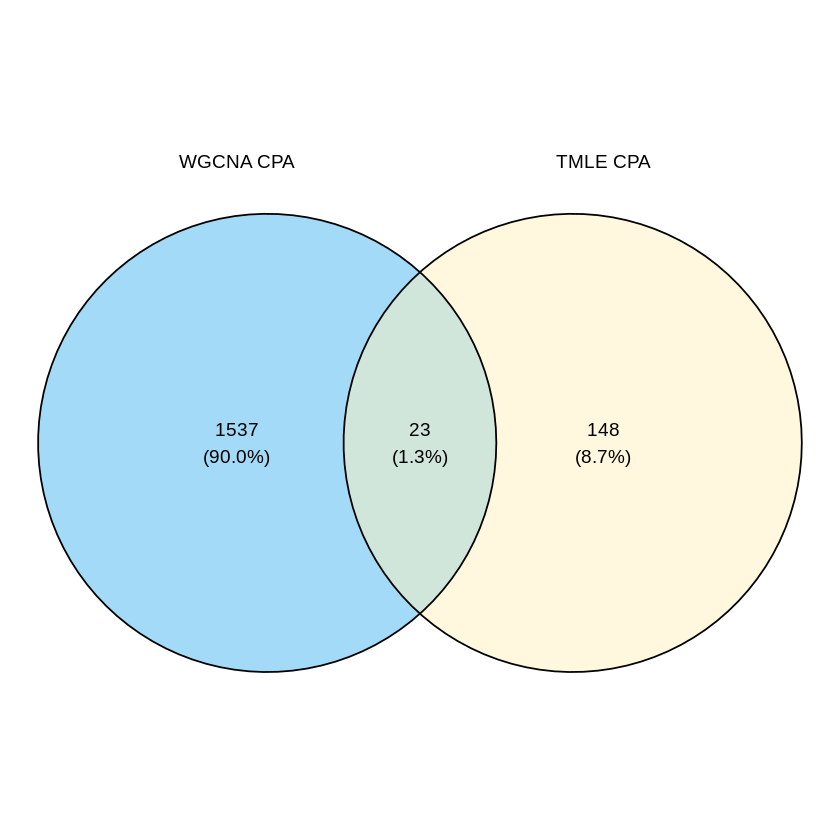

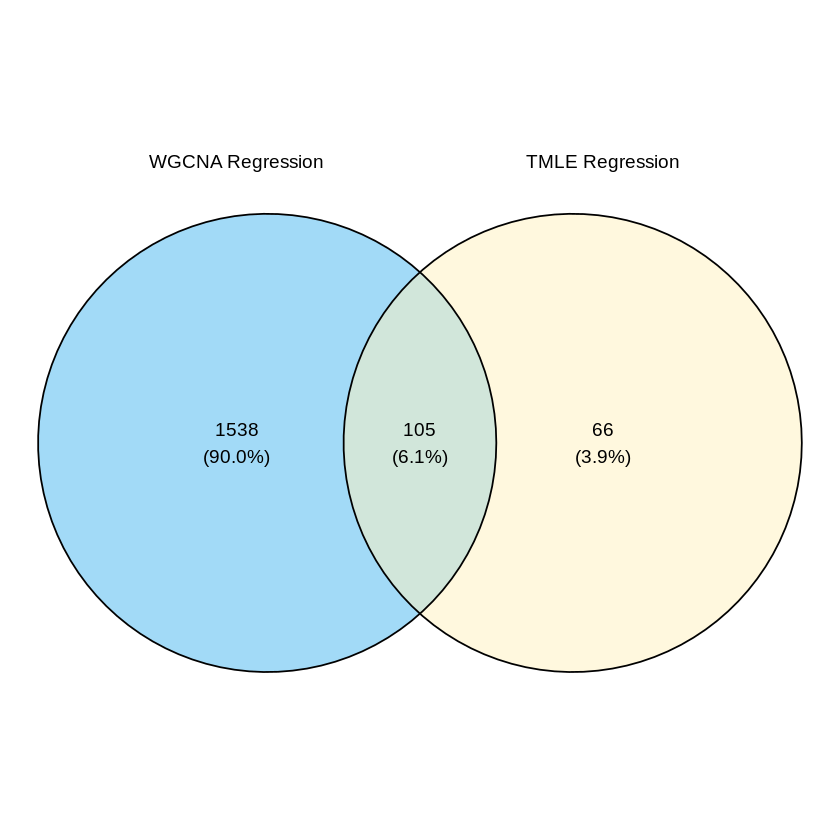

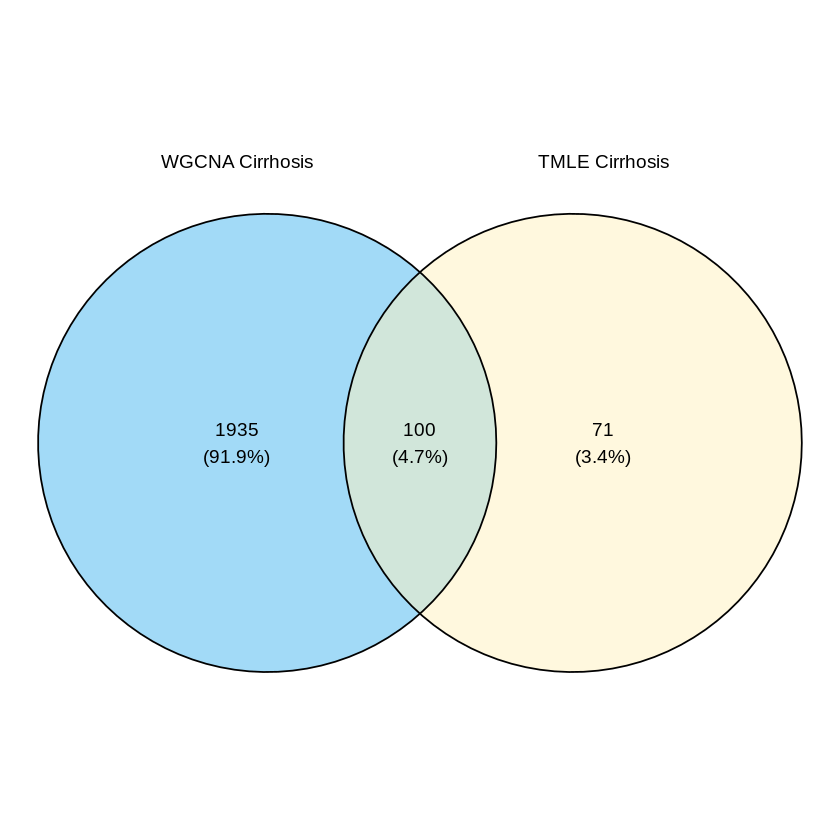

In [73]:
ggvenn(list("WGCNA PP" = wgcna_genes_pp$gene,
            "TMLE PP" = biotmle_genes$pp),
            fill_color = c("#46b6ef", "#fff2bd"),
  stroke_size = 0.5, set_name_size = 4)

ggvenn(list("WGCNA CPA" = wgcna_genes_cpa$gene,
            "TMLE CPA" = biotmle_genes$cpa),
            fill_color = c("#46b6ef", "#fff2bd"),
  stroke_size = 0.5, set_name_size = 4)

ggvenn(list("WGCNA Regression" = wgcna_genes_reg$gene,
            "TMLE Regression" = biotmle_genes$reg),
            fill_color = c("#46b6ef", "#fff2bd"),
  stroke_size = 0.5, set_name_size = 4)

ggvenn(list("WGCNA Cirrhosis" = wgcna_genes_cir$gene,
            "TMLE Cirrhosis" = biotmle_genes$cir),
            fill_color = c("#46b6ef", "#fff2bd"),
  stroke_size = 0.5, set_name_size = 4)

## PP

In [73]:
pred_list_pp = list()
for (i in 1:10){
    to_metadata_columns_pp <- t(subset(assay(vst(dds)), rownames(dds) %in% i_pp)) %>% as.data.frame() %>% tibble::rownames_to_column("Sample_id")
    to_metadata_columns_pp <- to_metadata_columns_pp %>% select(-c(Gm17767, Gm19845, Vmn2r1, Vmn2r3, Vmn2r2, Vmn2r4, Vmn2r5, `Vmn2r-ps11`, Fam163b, Fam177a2, Fam177a))
    to_keep <- sample(to_metadata_columns_pp[2:61], 20)
    to_metadata_columns_pp <- to_metadata_columns_pp %>% select(c(Sample_id, colnames(to_keep)))
    metadata_pp <- c()
    metadata_pp <- merge(metadata, to_metadata_columns_pp, by = "Sample_id")
    formula_pp <- c()
    formula_pp <- paste(to_metadata_columns_pp %>% select(-Sample_id) %>% colnames(), collapse=" + ")
    formula_pp <- paste("PP ~", formula_pp, sep = " ")
    to_metadata_columns_pp[2:ncol(to_metadata_columns_pp)] 
    allfits <- dredge(lm(as.formula(formula_pp), data = metadata_pp), m.lim = c(0, 5), evaluate = T, extra = "adjR^2")
    pred_list_pp[[i]] <- as.data.frame(allfits)
}
pred_dataframe_pp <- dplyr::bind_rows(pred_list_pp)
pred_dataframe_pp %>% as.data.frame() %>% arrange(desc(`adjR^2`))

Fixed term is "(Intercept)"

Fixed term is "(Intercept)"

Fixed term is "(Intercept)"

Fixed term is "(Intercept)"

Fixed term is "(Intercept)"

Fixed term is "(Intercept)"

Fixed term is "(Intercept)"

Fixed term is "(Intercept)"

Fixed term is "(Intercept)"

Fixed term is "(Intercept)"



(Intercept),Bmper,Ccn5,Col4a2,Fxyd6,Hunk,Iqgap3,Lysmd2,Matk,Mfge8,⋯,Col3a1,Il21r,Usp43,Angpt2,Fmnl1,Gpc6,Cavin3,C3ar1,Cfap69,Trim46
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-12.084027,NA,1.450380,NA,-0.5862885,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-10.292623,NA,1.338210,NA,-0.5810914,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-9.158711,NA,1.305369,-0.5024717,-0.5314702,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-6.533321,NA,1.149088,NA,NA,NA,0.5831692,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-8.809219,NA,1.348290,NA,-0.6408427,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-9.344817,NA,1.384637,NA,-0.6481111,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-10.141373,NA,1.371707,NA,-0.5265382,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-6.831362,NA,1.161431,-0.6641282,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
-10.372100,NA,1.098479,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


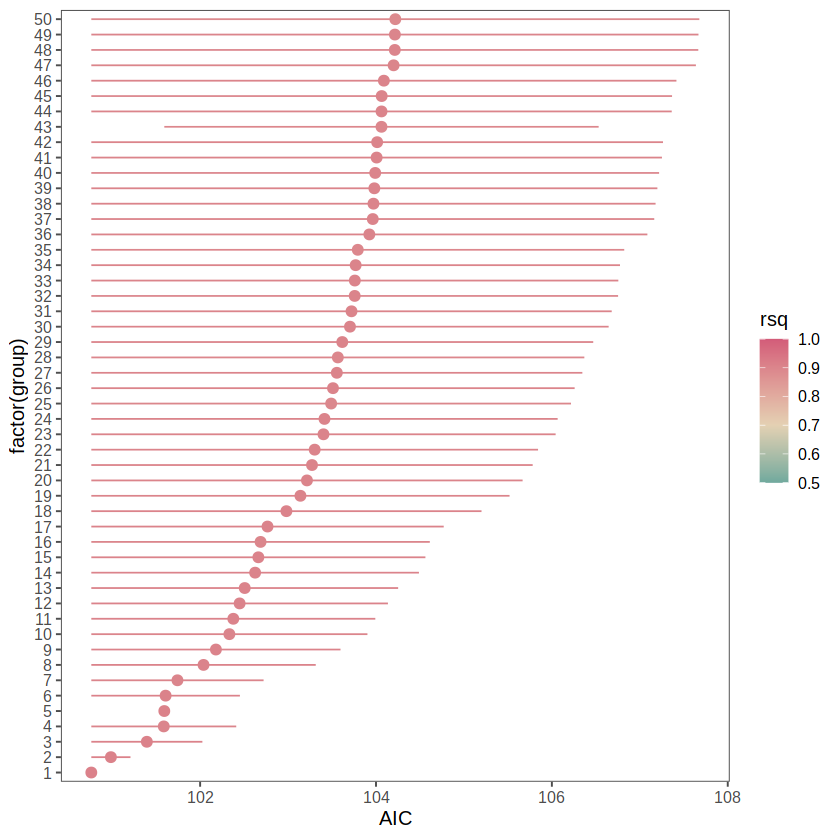

In [276]:
#pred_dataframe_pp %>% as.data.frame() %>% arrange(desc(`adjR^2`)) %>% dplyr::slice(1) %>% select_if(~sum(!is.na(.)) > 0) select(-c("(Intercept)", `adjR^2`, "df", "logLik", "AICc", "delta", "weight")) %>% colnames()
prio_list_pp <- list()
for (i in 1:50){
    features <- pred_dataframe_pp %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(-c("(Intercept)", `adjR^2`, "df", "logLik", "AICc", "delta", "weight")) %>% colnames()
    AIC <- pred_dataframe_pp %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(AICc) %>% as.numeric()
    rsq <- pred_dataframe_pp %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(`adjR^2`) %>% as.numeric()
    delta <- pred_dataframe_pp %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(delta) %>% as.numeric()
    tmp <- as.data.frame(tibble(genes = list(features), AIC = AIC, rsq = rsq, delta = delta, group = i))
    prio_list_pp[[i]] <- as.data.frame(tmp)
}
prio_list_pp <- dplyr::bind_rows(prio_list_pp)
ggplot(prio_list_pp, aes(x = factor(group), y = AIC, color = rsq, ymin = (AIC-delta), ymax = (AIC+delta))) +
    geom_pointrange() +
 #   geom_hline(yintercept = median(prio_list_pp$AIC), col="darkgrey", lty = 3, lwd=2) +
    coord_flip() + ggthemes::theme_few() + scale_color_gradient2(limits = c(0.5, 1), midpoint = 0.7, low = "#009593", mid = "#e4d1b3", high = "#d35c79")


`geom_smooth()` using formula = 'y ~ x'


[1] "Ccn5"  "Fxyd6" "Grk3"  "Ica1"  "Ltbp2"


`geom_smooth()` using formula = 'y ~ x'


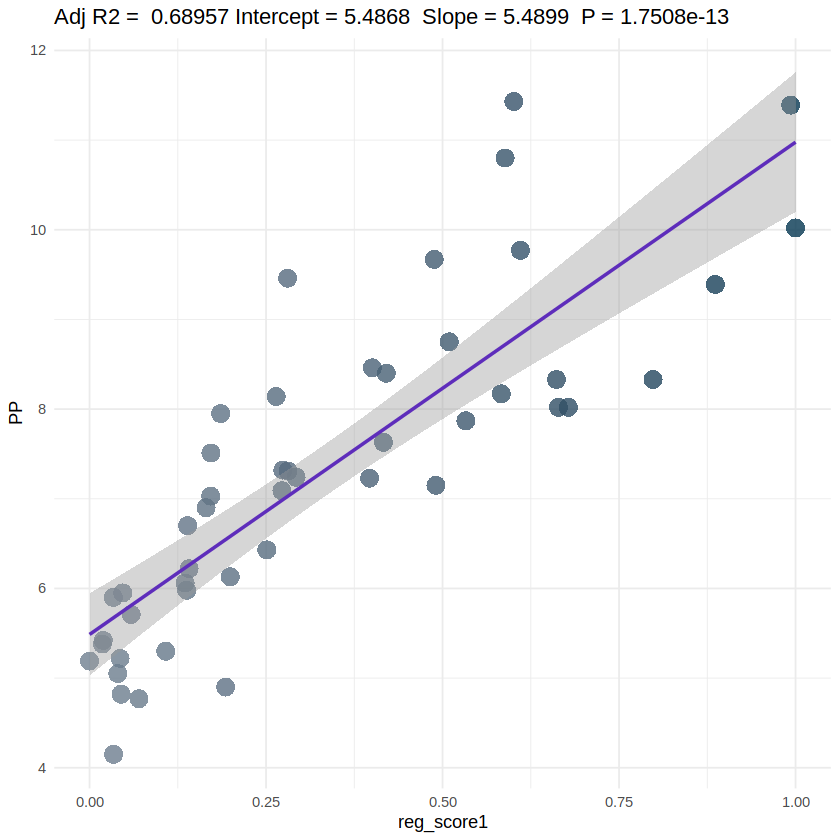

[1] "Ccn5"   "Fxyd6"  "Fkbp11" "Ica1"   "Ltbp2" 


`geom_smooth()` using formula = 'y ~ x'


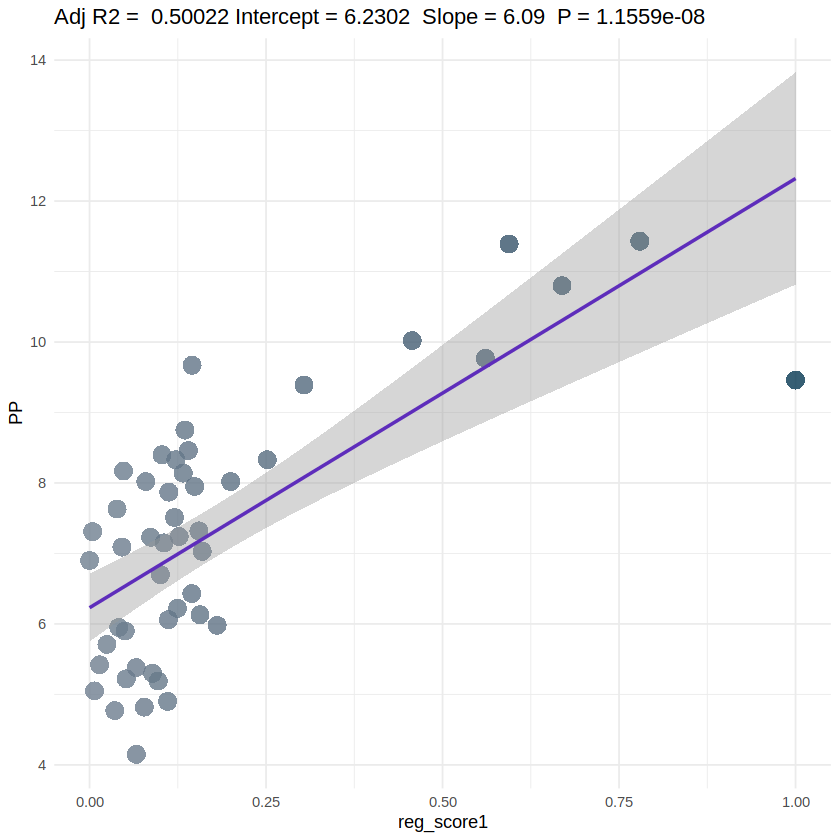

[1] "Ccn5"   "Col4a2" "Fxyd6"  "Ica1"   "Ltbp2" 


`geom_smooth()` using formula = 'y ~ x'


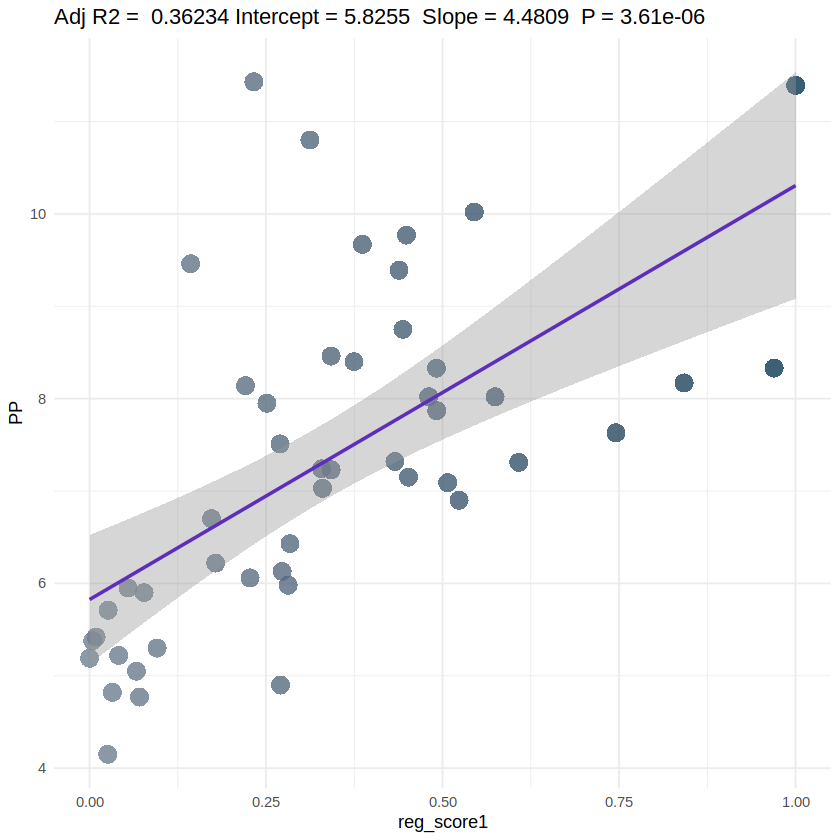

[1] "Ccn5"   "Iqgap3" "Myo5a"  "Sparc"  "Basp1" 


`geom_smooth()` using formula = 'y ~ x'


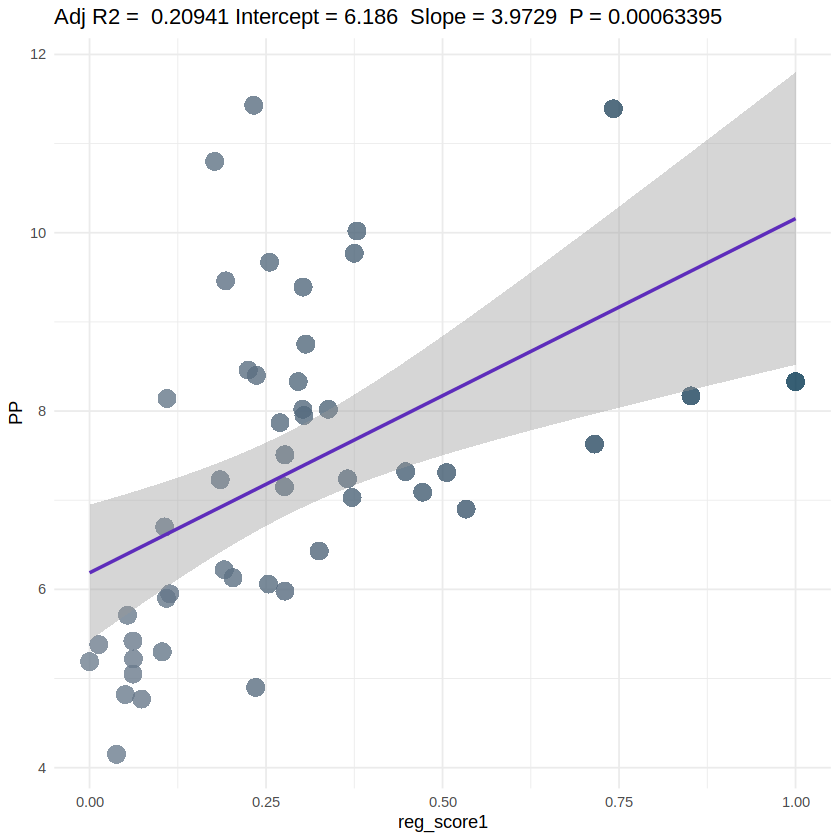

[1] "Ccn5"   "Fxyd6"  "Basp1"  "Fkbp11" "Ltbp2" 


`geom_smooth()` using formula = 'y ~ x'


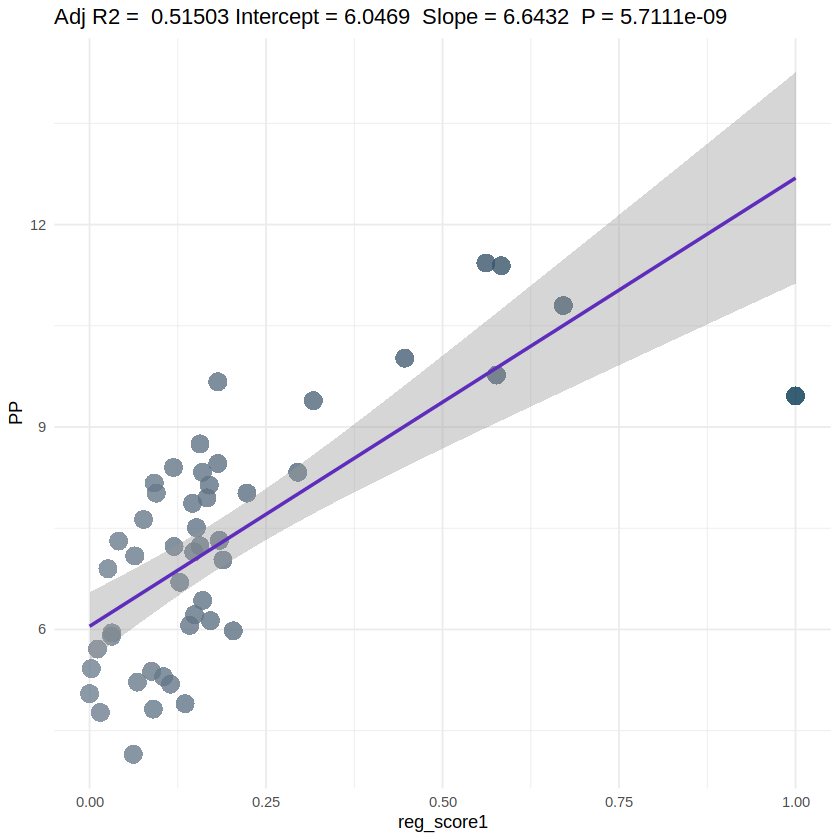

[1] "Ccn5"   "Fxyd6"  "Fkbp11" "Grk3"   "Ltbp2" 


`geom_smooth()` using formula = 'y ~ x'


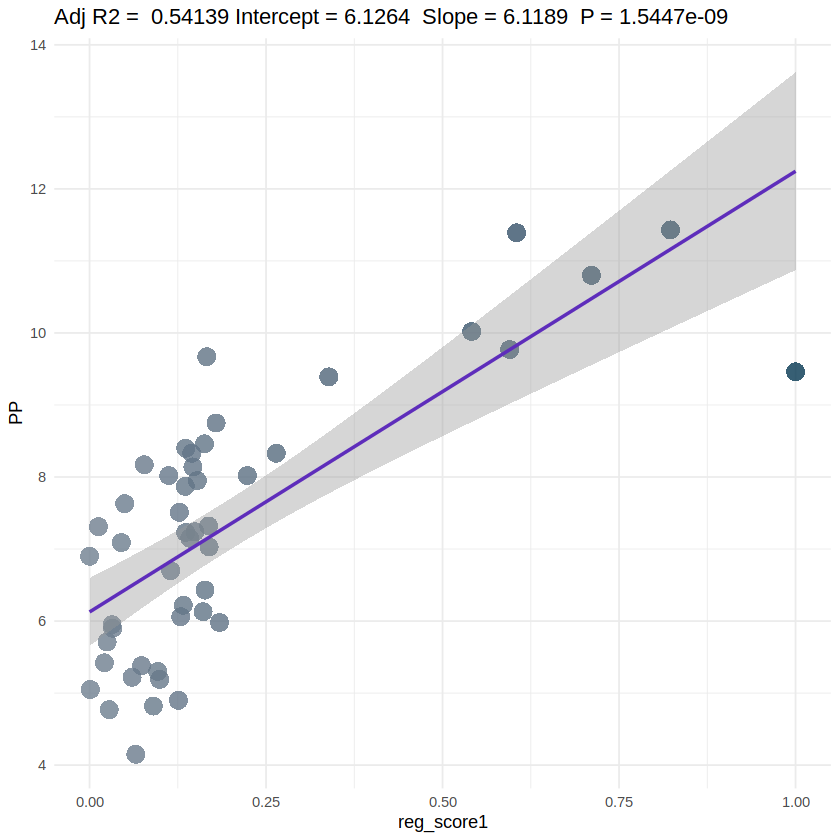

[1] "Ccn5"   "Fxyd6"  "Zfp248" "Fkbp11" "Ltbp2" 


`geom_smooth()` using formula = 'y ~ x'


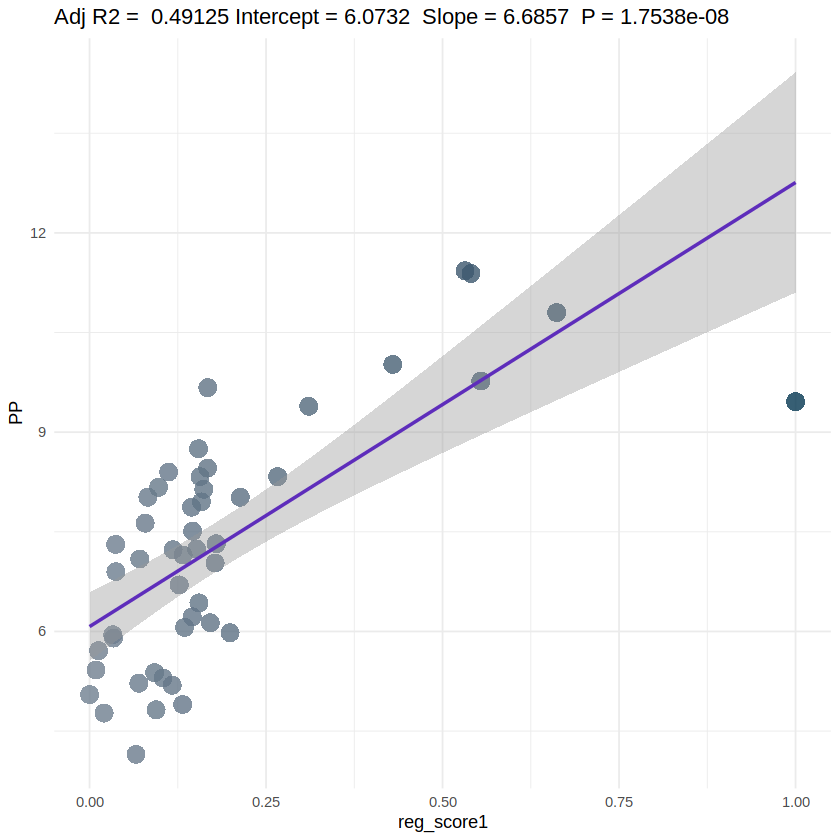

[1] "Ccn5"    "Col4a2"  "Akr1c18" "Ica1"    "Ltbp2"  


`geom_smooth()` using formula = 'y ~ x'


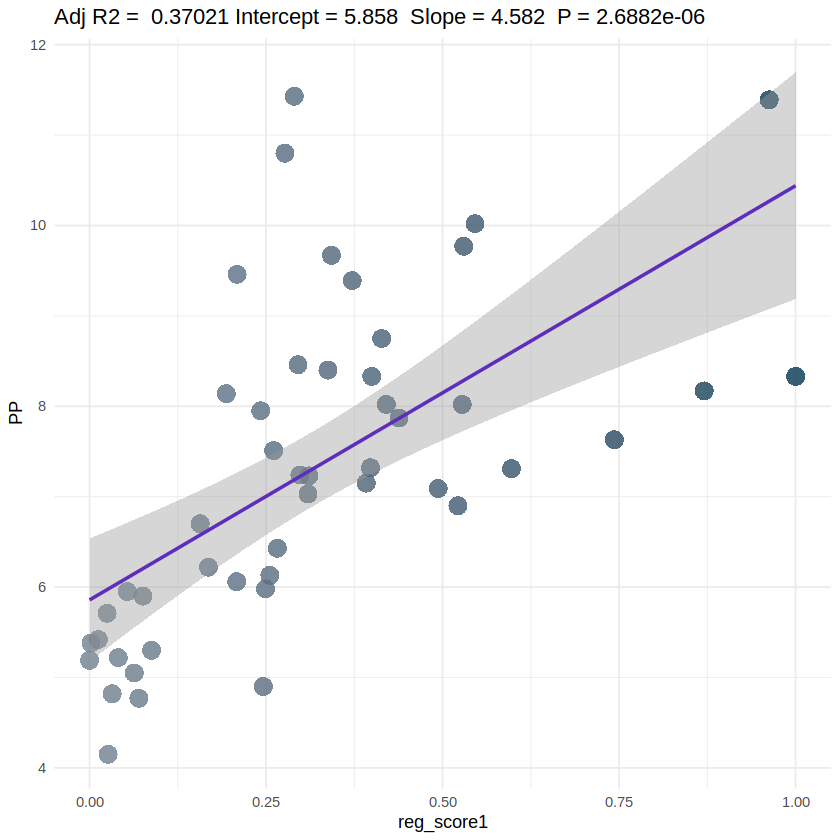

[1] "Ccn5"   "Fkbp11" "Gpx3"   "Ica1"   "Ltbp2" 


`geom_smooth()` using formula = 'y ~ x'


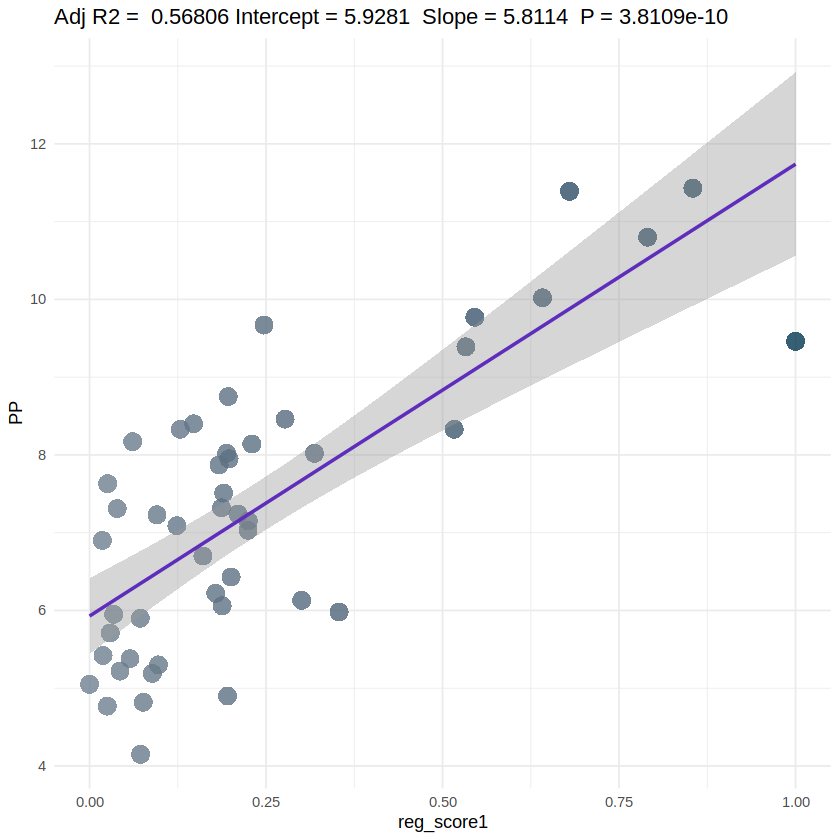

[1] "Ccn5"   "Col4a2" "Zfp248" "Ica1"   "Ltbp2" 


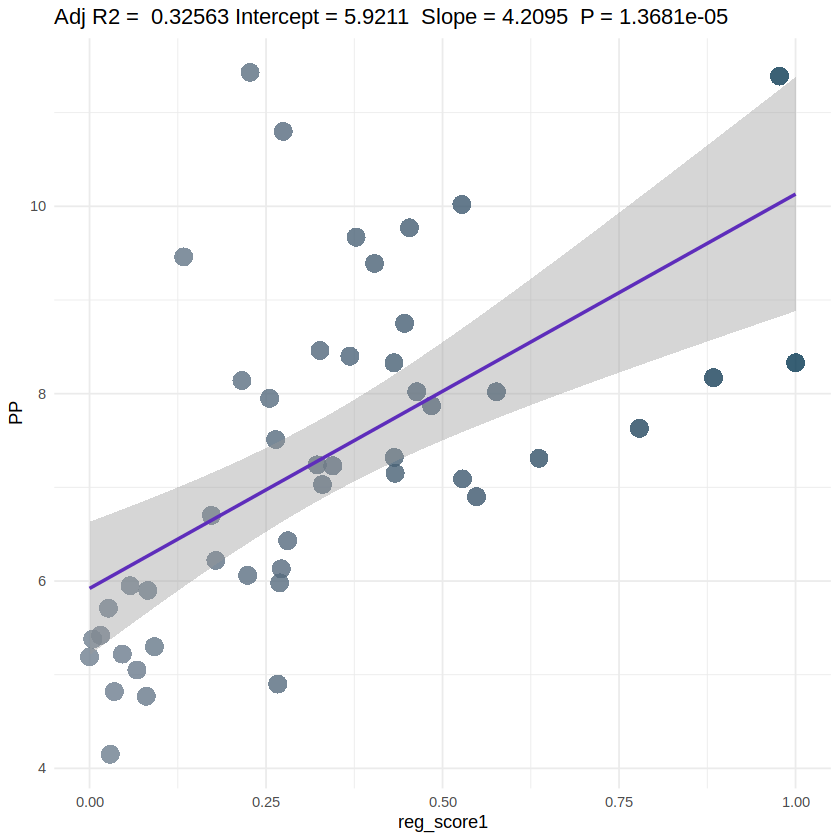

In [112]:
for (number in 1:10){
    features = pred_dataframe_pp %>% as.data.frame() %>% arrange(desc(`adjR^2`)) %>% dplyr::slice(number) %>% select_if(~sum(!is.na(.)) > 0) %>% select(-c("(Intercept)", `adjR^2`, "df", "logLik", "AICc", "delta", "weight")) %>% colnames()
    dds_reg <- AddGeneSetScore(dds, 
                        nbin = 24,
                        features = features,
                        ctrl = 10,
                        name = 'reg_score'
                        )
    df_reg <- as.data.frame(colData(dds_reg))
    lm_reg <- lm(PP ~ reg_score1, data = df_reg)
    print(ggplotRegression_ccl4(lm_reg))
    print(features)
}

## CPA

In [264]:
to_metadata_columns_cpa <- t(subset(assay(vst(dds)), rownames(dds) %in% i_cpa)) %>% as.data.frame() %>% tibble::rownames_to_column("Sample_id")
metadata_cpa <- merge(metadata, to_metadata_columns_cpa, by = "Sample_id")
formula_cpa <- c()
formula_cpa <- paste(to_metadata_columns_cpa %>% select(-Sample_id) %>% colnames(), collapse=" + ")
formula_cpa <- paste("CPA ~", formula_cpa, sep = " ")
options(na.action = "na.fail")
allfits <- dredge(lm(as.formula(formula_cpa), data = metadata_cpa), evaluate = T, extra = "adjR^2")
options(na.action = "na.omit")
pred_dataframe_cpa <- as.data.frame(allfits)

Fixed term is "(Intercept)"



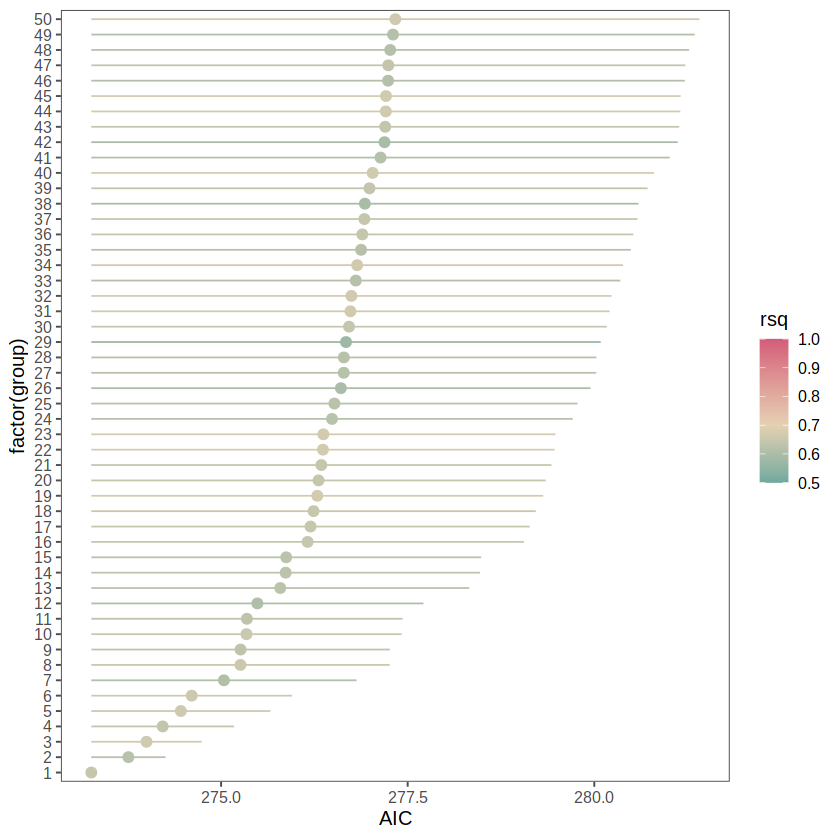

In [275]:
#pred_dataframe_cpa %>% as.data.frame() %>% arrange(desc(`adjR^2`)) %>% dplyr::slice(1) %>% select_if(~sum(!is.na(.)) > 0) select(-c("(Intercept)", `adjR^2`, "df", "logLik", "AICc", "delta", "weight")) %>% colnames()
prio_list_cpa <- list()
for (i in 1:50){
    features <- pred_dataframe_cpa %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(-c("(Intercept)", `adjR^2`, "df", "logLik", "AICc", "delta", "weight")) %>% colnames()
    AIC <- pred_dataframe_cpa %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(AICc) %>% as.numeric()
    rsq <- pred_dataframe_cpa %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(`adjR^2`) %>% as.numeric()
    delta <- pred_dataframe_cpa %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(delta) %>% as.numeric()
    tmp <- as.data.frame(tibble(genes = list(features), AIC = AIC, rsq = rsq, delta = delta, group = i))
    prio_list_cpa[[i]] <- as.data.frame(tmp)
}
prio_list_cpa <- dplyr::bind_rows(prio_list_cpa)
ggplot(prio_list_cpa, aes(x = factor(group), y = AIC, color = rsq, ymin = (AIC-delta), ymax = (AIC+delta))) +
    geom_pointrange() +
 #   geom_hline(yintercept = median(prio_list_cpa$AIC), col="darkgrey", lty = 3, lwd=2) +
    coord_flip() + ggthemes::theme_few() + scale_color_gradient2(limits = c(0.5, 1), midpoint = 0.7, low = "#009593", mid = "#e4d1b3", high = "#d35c79")


`geom_smooth()` using formula = 'y ~ x'


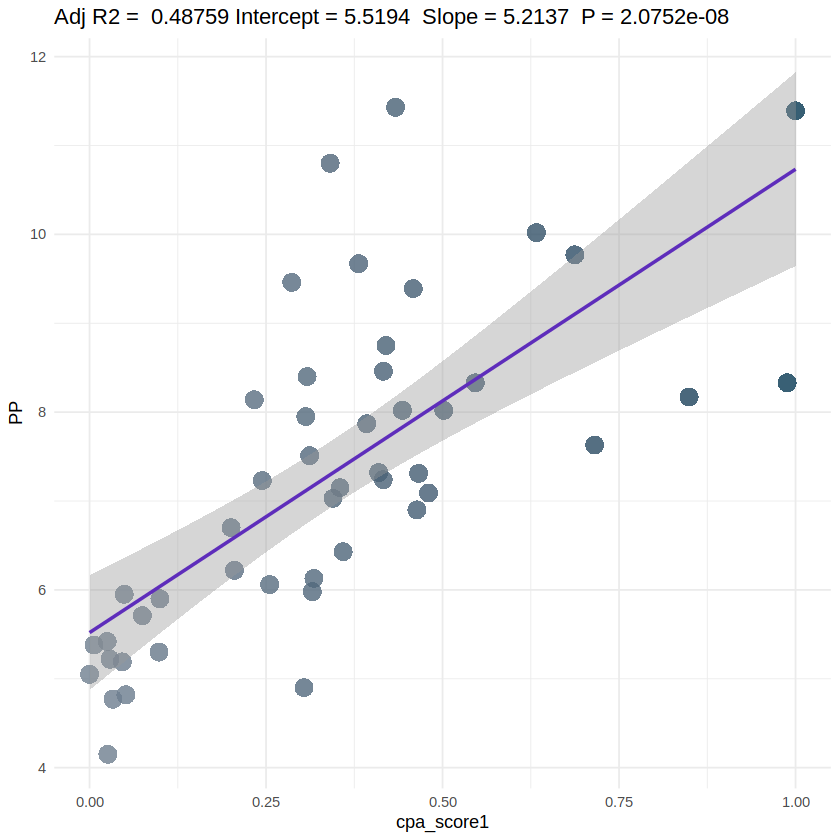

In [364]:
dds_cpa <- AddGeneSetScore(dds, 
                       nbin = 24,
                       features = to_metadata_columns_cpa %>% select(-Sample_id) %>% colnames(),
                       ctrl = 10,
                       name = 'cpa_score'
                       )
df_cpa <- as.data.frame(colData(dds_cpa))
lm_cpa <- lm(PP ~ cpa_score1, data = df_cpa)
ggplotRegression_ccl4(lm_cpa)

## Regression

In [ ]:
pred_list_reg = list()
options(na.action = "na.fail")
for (i in 1:2){
    to_metadata_columns_reg <- t(subset(assay(vst(dds)), rownames(dds) %in% i_reg)) %>% as.data.frame() %>% tibble::rownames_to_column("Sample_id")
    to_metadata_columns_reg <- to_metadata_columns_reg %>% select(-c(`H2-Eb1`, `H2-Ab1`, `Gm7609`, `D630003M21Rik`, `H2-Aa`, `H2-Ob`))
    to_keep <- sample(to_metadata_columns_reg[2:33], 20)
    subsub <- round(length(colnames)/5)
    for (i in 1:length(subsub))
        to_metadata_columns_reg <- to_metadata_columns_reg %>% select(c(Sample_id, colnames(to_keep)))
        metadata_reg <- c()
        metadata_reg <- merge(metadata, to_metadata_columns_reg, by = "Sample_id")
        metadata_reg$Regression[metadata_reg$Regression == "negative"] <- 0 
        metadata_reg$Regression[metadata_reg$Regression == "positive"] <- 0 
        metadata_reg$Regression[metadata_reg$Regression == "regression"] <- 1
        formula_reg <- c()
        formula_reg <- paste(to_metadata_columns_reg %>% select(-Sample_id) %>% colnames(), collapse=" + ")
        formula_reg <- paste("Regression ~", formula_reg, sep = " ")
        to_metadata_columns_reg[2:ncol(to_metadata_columns_reg)] 
        allfits <- lm(as.formula(formula_reg), data = metadata_reg)
}
options(na.action = "na.omit")
pred_dataframe_reg <- dplyr::bind_rows(pred_list_reg)
pred_dataframe_reg %>% as.data.frame() %>% arrange(desc(`adjR^2`))

In [ ]:
as.data.frame(summary(lm(Regression ~ Rcn3 + Adgrl1 + Adam33 + Lamc3 + Adamtsl2, data = metadata_reg)))

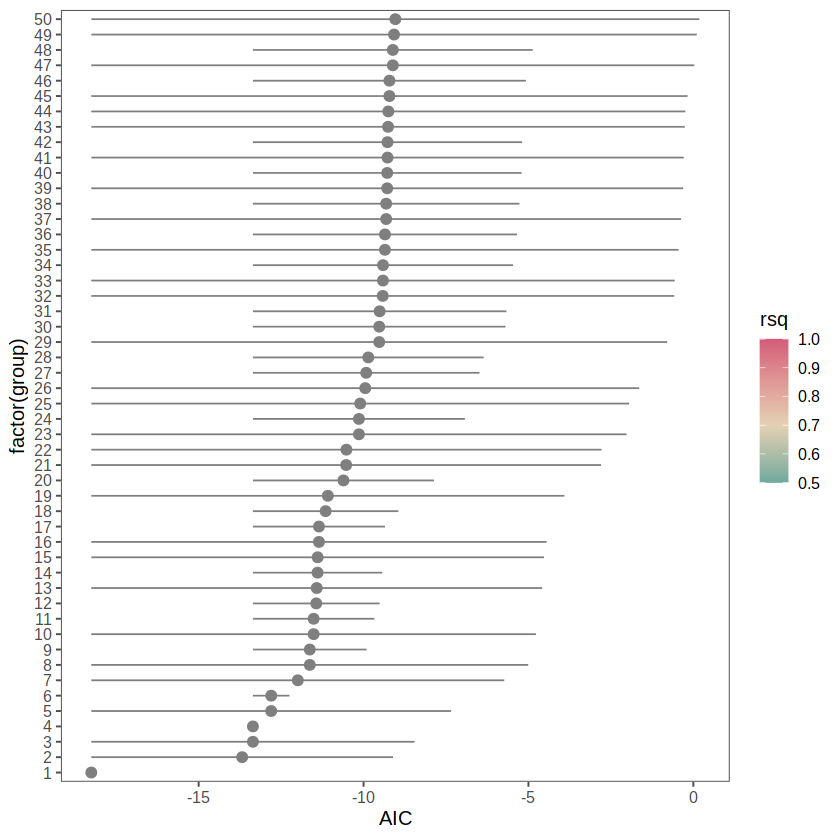

In [301]:
#pred_dataframe_reg %>% as.data.frame() %>% arrange(desc(`adjR^2`)) %>% dplyr::slice(1) %>% select_if(~sum(!is.na(.)) > 0) select(-c("(Intercept)", `adjR^2`, "df", "logLik", "AICc", "delta", "weight")) %>% colnames()
prio_list_reg <- list()
for (i in 1:50){
    features <- pred_dataframe_reg %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(-c("(Intercept)", `adjR^2`, "df", "logLik", "AICc", "delta", "weight")) %>% colnames()
    AIC <- pred_dataframe_reg %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(AICc) %>% as.numeric()
    rsq <- pred_dataframe_reg %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(`adjR^2`) %>% as.numeric()
    delta <- pred_dataframe_reg %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(delta) %>% as.numeric()
    tmp <- as.data.frame(tibble(genes = list(features), AIC = AIC, rsq = rsq, delta = delta, group = i))
    prio_list_reg[[i]] <- as.data.frame(tmp)
}
prio_list_reg <- dplyr::bind_rows(prio_list_reg)
ggplot(prio_list_reg, aes(x = factor(group), y = AIC, color = rsq, ymin = (AIC-delta), ymax = (AIC+delta))) +
    geom_pointrange() +
 #   geom_hline(yintercept = median(prio_list_reg$AIC), col="darkgrey", lty = 3, lwd=2) +
    coord_flip() + ggthemes::theme_few() + scale_color_gradient2(limits = c(0.5, 1), midpoint = 0.7, low = "#009593", mid = "#e4d1b3", high = "#d35c79")


`geom_smooth()` using formula = 'y ~ x'


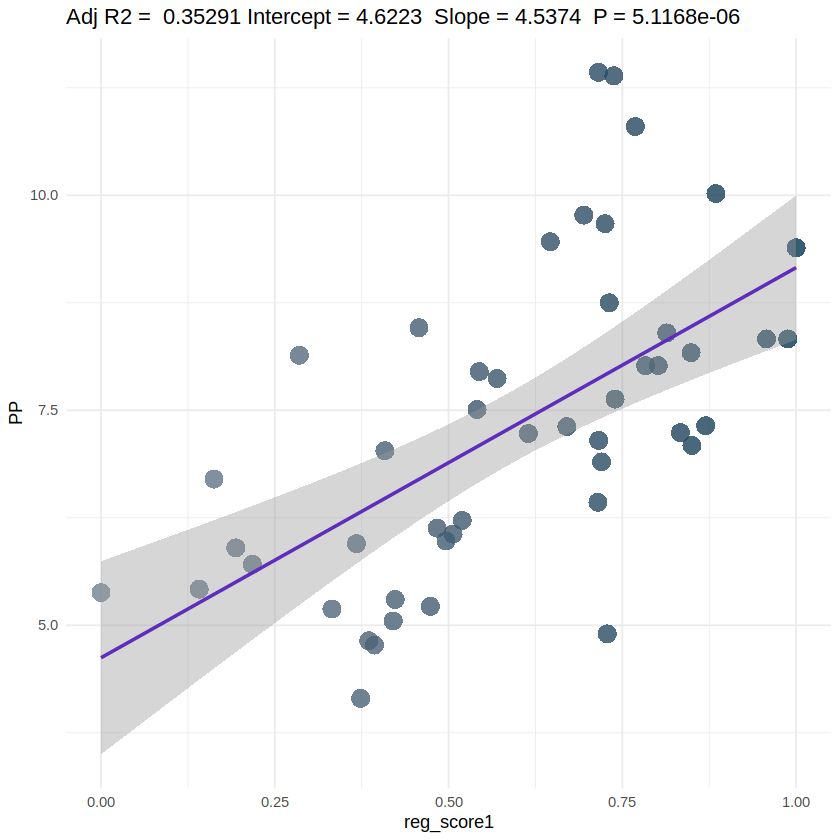

In [344]:
dds_reg <- AddGeneSetScore(dds, 
                       nbin = 24,
                       features = to_metadata_columns_reg %>% select(-Sample_id) %>% colnames(),
                       ctrl = 10,
                       name = 'reg_score'
                       )
df_reg <- as.data.frame(colData(dds_reg))
lm_reg <- lm(PP ~ reg_score1, data = df_reg)
ggplotRegression_ccl4(lm_reg)

## Cirrhosis

In [307]:
to_metadata_columns_cir <- t(subset(assay(vst(dds)), rownames(dds) %in% i_cir)) %>% as.data.frame() %>% tibble::rownames_to_column("Sample_id")
to_metadata_columns_cir <- to_metadata_columns_cir 
metadata <- merge(metadata, to_metadata_columns_cir, by = "Sample_id")
formula_cir <- paste(to_metadata_columns_cir %>% select(-Sample_id) %>% colnames(), collapse=" + ")
formula_cir <- paste("cir ~", formula_cir, sep = " ")

In [ ]:
pred_list_cir = list()
options(na.action = "na.fail")
for (i in 1:10){
    to_metadata_columns_cir <- t(subset(assay(vst(dds)), rownames(dds) %in% i_cir)) %>% as.data.frame() %>% tibble::rownames_to_column("Sample_id")
   # to_metadata_columns_cir <- to_metadata_columns_cir %>% select(-c(`H2-Eb1`, `H2-Ab1`, `Gm7609`, `D630003M21Rik`, `H2-Aa`, `H2-Ob`))
    to_keep <- sample(to_metadata_columns_cir[2:33], 20)
    to_metadata_columns_cir <- to_metadata_columns_cir %>% select(c(Sample_id, colnames(to_keep)))
    metadata_cir <- c()
    metadata_cir <- merge(metadata, to_metadata_columns_cir, by = "Sample_id")
    metadata_cir$isCirrhotic[metadata$isCirrhotic == "no"] <- 0 
    metadata_cir$isCirrhotic[metadata$isCirrhotic == "yes"] <- 1 
    formula_cir <- c()
    formula_cir <- paste(to_metadata_columns_cir %>% select(-Sample_id) %>% colnames(), collapse=" + ")
    formula_cir <- paste("cirression ~", formula_cir, sep = " ")
    to_metadata_columns_cir[2:ncol(to_metadata_columns_cir)] 
    allfits <- dredge(lm(as.formula(formula_cir), data = metadata_cir), m.lim = c(0, 5), evaluate = T, extra = "adjR^2")
    pred_list_cir[[i]] <- as.data.frame(allfits)
}
options(na.action = "na.omit")
pred_dataframe_cir <- dplyr::bind_rows(pred_list_cir)
pred_dataframe_cir %>% as.data.frame() %>% arrange(desc(`adjR^2`))

In [ ]:
#pred_dataframe_cir %>% as.data.frame() %>% arrange(desc(`adjR^2`)) %>% dplyr::slice(1) %>% select_if(~sum(!is.na(.)) > 0) select(-c("(Intercept)", `adjR^2`, "df", "logLik", "AICc", "delta", "weight")) %>% colnames()
prio_list_cir <- list()
for (i in 1:50){
    features <- pred_dataframe_cir %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(-c("(Intercept)", `adjR^2`, "df", "logLik", "AICc", "delta", "weight")) %>% colnames()
    AIC <- pred_dataframe_cir %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(AICc) %>% as.numeric()
    rsq <- pred_dataframe_cir %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(`adjR^2`) %>% as.numeric()
    delta <- pred_dataframe_cir %>% as.data.frame() %>% arrange(AICc) %>% dplyr::slice(i) %>% select_if(~sum(!is.na(.)) > 0) %>% select(delta) %>% as.numeric()
    tmp <- as.data.frame(tibble(genes = list(features), AIC = AIC, rsq = rsq, delta = delta, group = i))
    prio_list_cir[[i]] <- as.data.frame(tmp)
}
prio_list_cir <- dplyr::bind_rows(prio_list_cir)
ggplot(prio_list_cir, aes(x = factor(group), y = AIC, color = rsq, ymin = (AIC-delta), ymax = (AIC+delta))) +
    geom_pointrange() +
 #   geom_hline(yintercept = median(prio_list_cir$AIC), col="darkgrey", lty = 3, lwd=2) +
    coord_flip() + ggthemes::theme_few() + scale_color_gradient2(limits = c(0.5, 1), midpoint = 0.7, low = "#009593", mid = "#e4d1b3", high = "#d35c79")


`geom_smooth()` using formula = 'y ~ x'


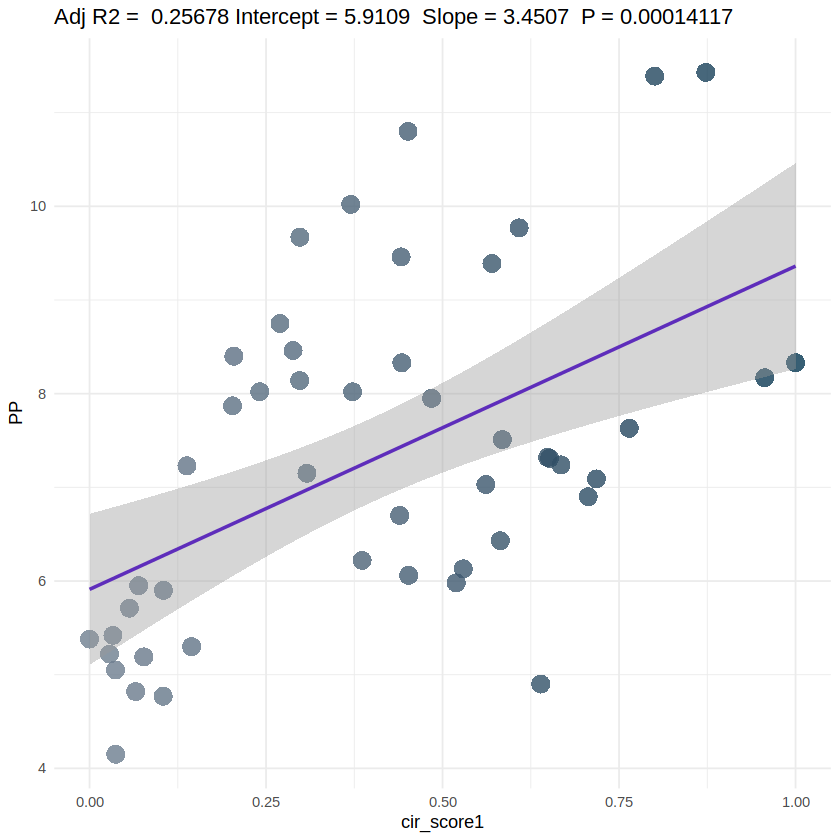

In [349]:
dds_cir <- AddGeneSetScore(dds, 
                       nbin = 24,
                       features = to_metadata_columns_cir %>% select(-Sample_id) %>% colnames(),
                       ctrl = 10,
                       name = 'cir_score'
                       )
df_cir <- as.data.frame(colData(dds_cir))
lm_cir <- lm(PP ~ cir_score1, data = df_cir)
ggplotRegression_ccl4(lm_cir)

## GSEA

In [32]:
i_pp <- setdiff(i_pp, remove)
i_cpa <- setdiff(i_cpa, remove)
i_cir <- setdiff(i_cir, remove)
i_reg <- setdiff(i_reg, remove)

In [75]:
pp_l <- list(genes = i_pp, module = "PP")
cpa_l <- list(genes = i_cpa, module = "CPA")
cir_l <- list(genes = i_cir, module = "Cirrhosis")
reg_l <- list(genes = i_reg, module = "Regression")
tmp_df <- data.frame(pp_l)
tmp_df <- dplyr::bind_rows(tmp_df, cpa_l, cir_l, reg_l)


In [76]:
prioritized_genes <- tmp_df

In [77]:
setEnrichrSite("Enrichr")
dbs <- listEnrichrDbs()
dbs <- c("MSigDB_Hallmark_2020", "Reactome_2022", "WikiPathways_2019_Mouse")

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



In [78]:
enrichr_to_plot <- function(dataframe, database){
    tmp = dataframe[[database]] %>% top_n(10, wt = Combined.Score) %>% tidyr::separate("Overlap", sep = "/", into = c("Gene_number", "max")) 
    tmp$Gene_number = as.numeric(tmp$Gene_number)
    tmp = tmp %>% arrange(desc(Gene_number))

    options(repr.plot.width=10, repr.plot.height=8, repr.plot.pointsize = 20)

    tf_p <- ggplot(as.data.frame(tmp), aes(x = reorder(Term, Gene_number), y = Gene_number, fill = -log(Adjusted.P.value, base=10))) +
    geom_bar(stat ="identity", width = 0.5, alpha = 0.8) +
    coord_flip() +
    labs(x="Pathways", y="Number of genes", fill="Adjusted P-value (log10)", title = paste0("Pathway enrichment using ", database)) +
    theme(axis.text=element_text(size=20)) + 
    theme(legend.position="none") +
    theme(axis.text.x = element_text(color="black", 
                            size=20),
            axis.text.y = element_text(color="black", 
                            size=20)) +
    theme_light() + scale_fill_gradient(
    low = "#AEBAF8", 
    high = "#9600FF"
    )


tf_p 
}
    

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying Reactome_2022... Done.
  Querying WikiPathways_2019_Mouse... Done.
Parsing results... Done.


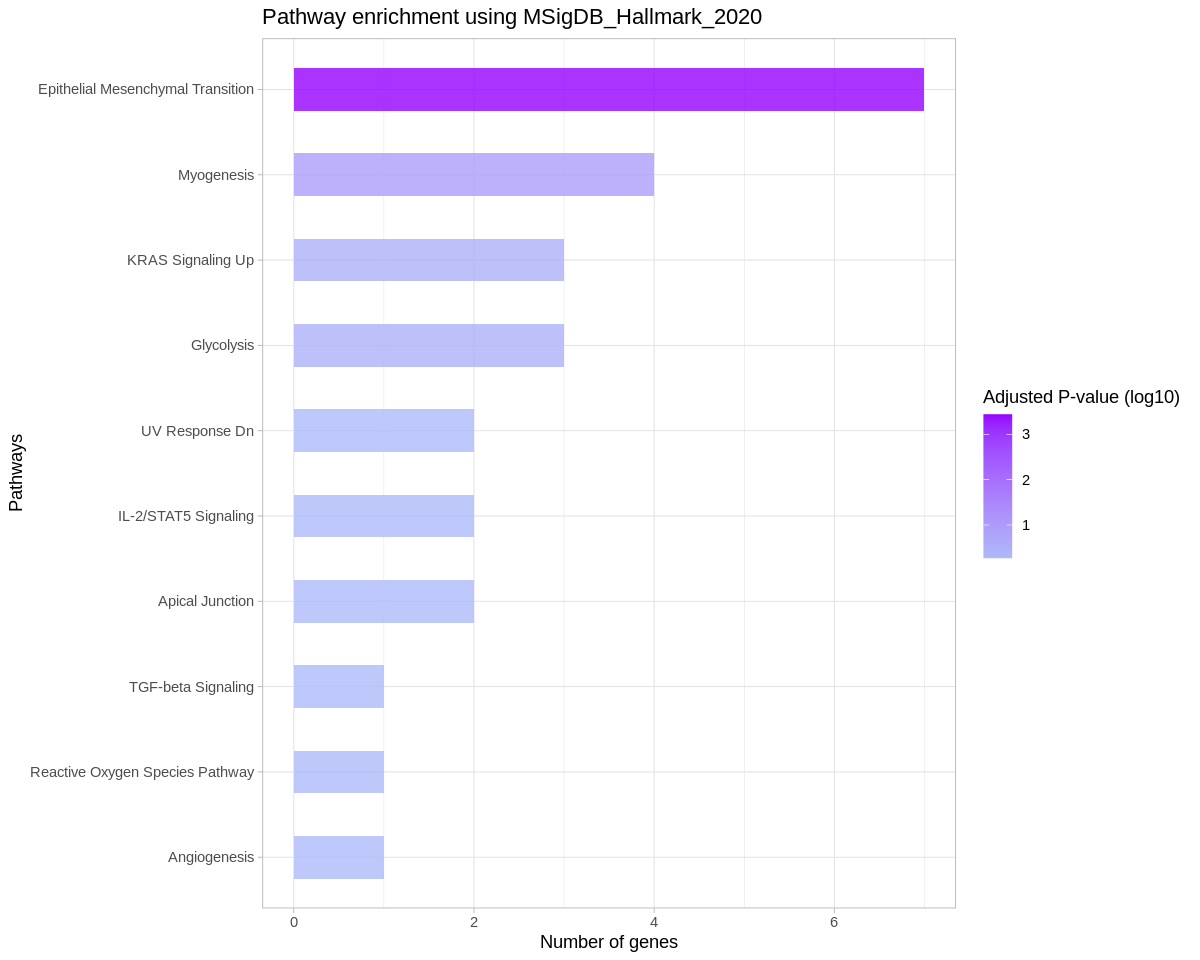

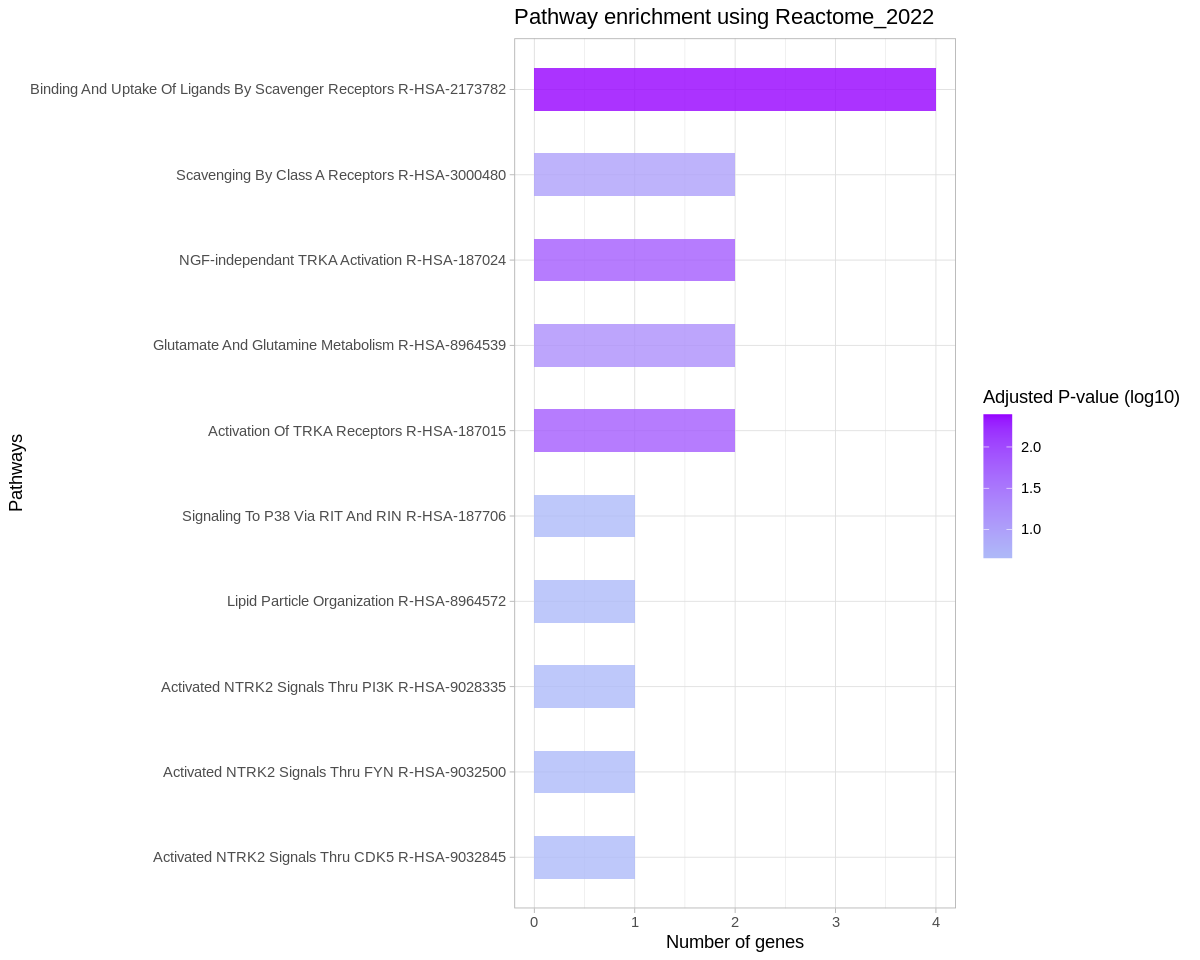

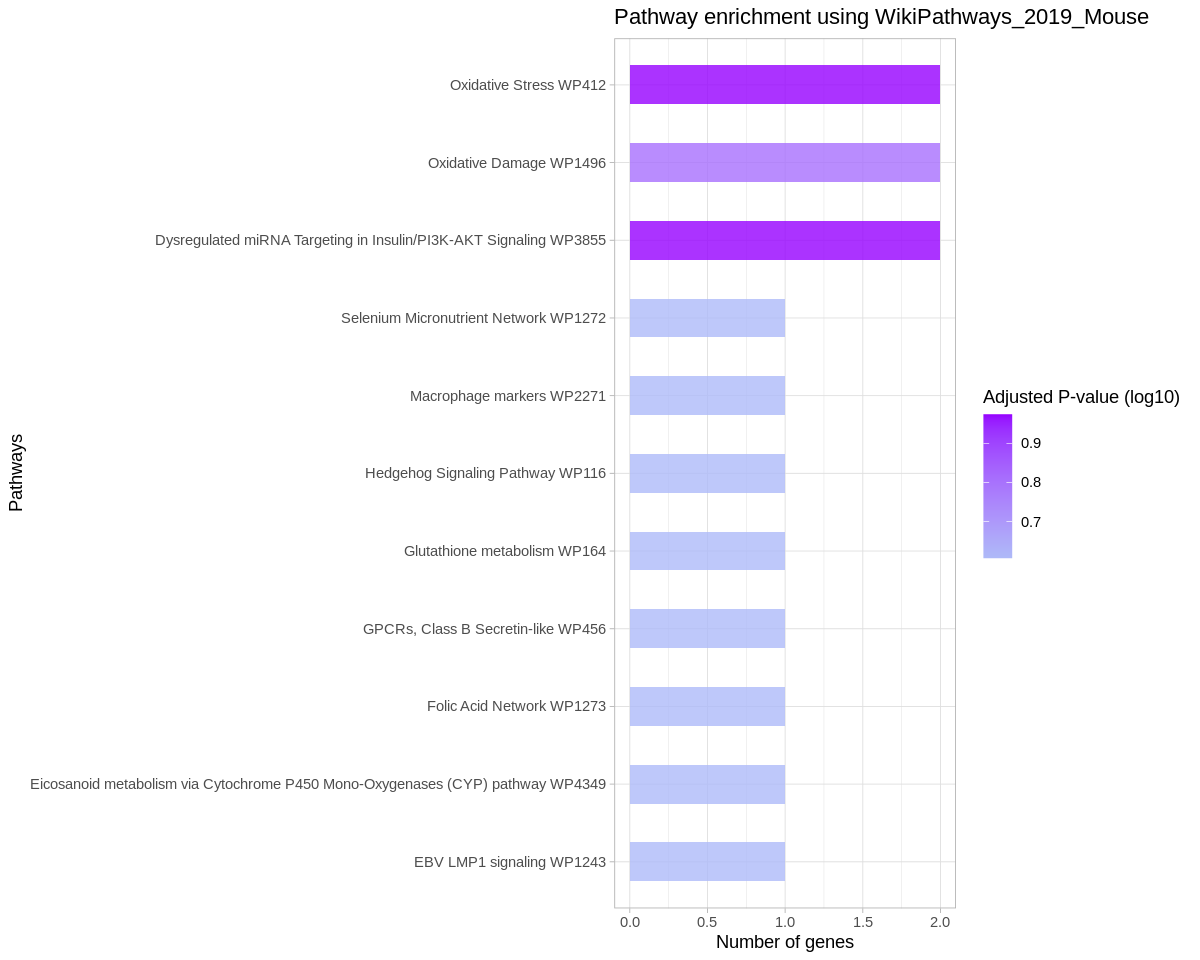

In [79]:
prio_pp <- prioritized_genes %>% filter(module == "PP") %>% select(genes)
prio_pp <- enrichr(prio_pp$gene, dbs)
for (db in dbs){
    plot <- enrichr_to_plot(prio_pp, db)
    print(plot)
}

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying Reactome_2022... Done.
  Querying WikiPathways_2019_Mouse... Done.
Parsing results... Done.


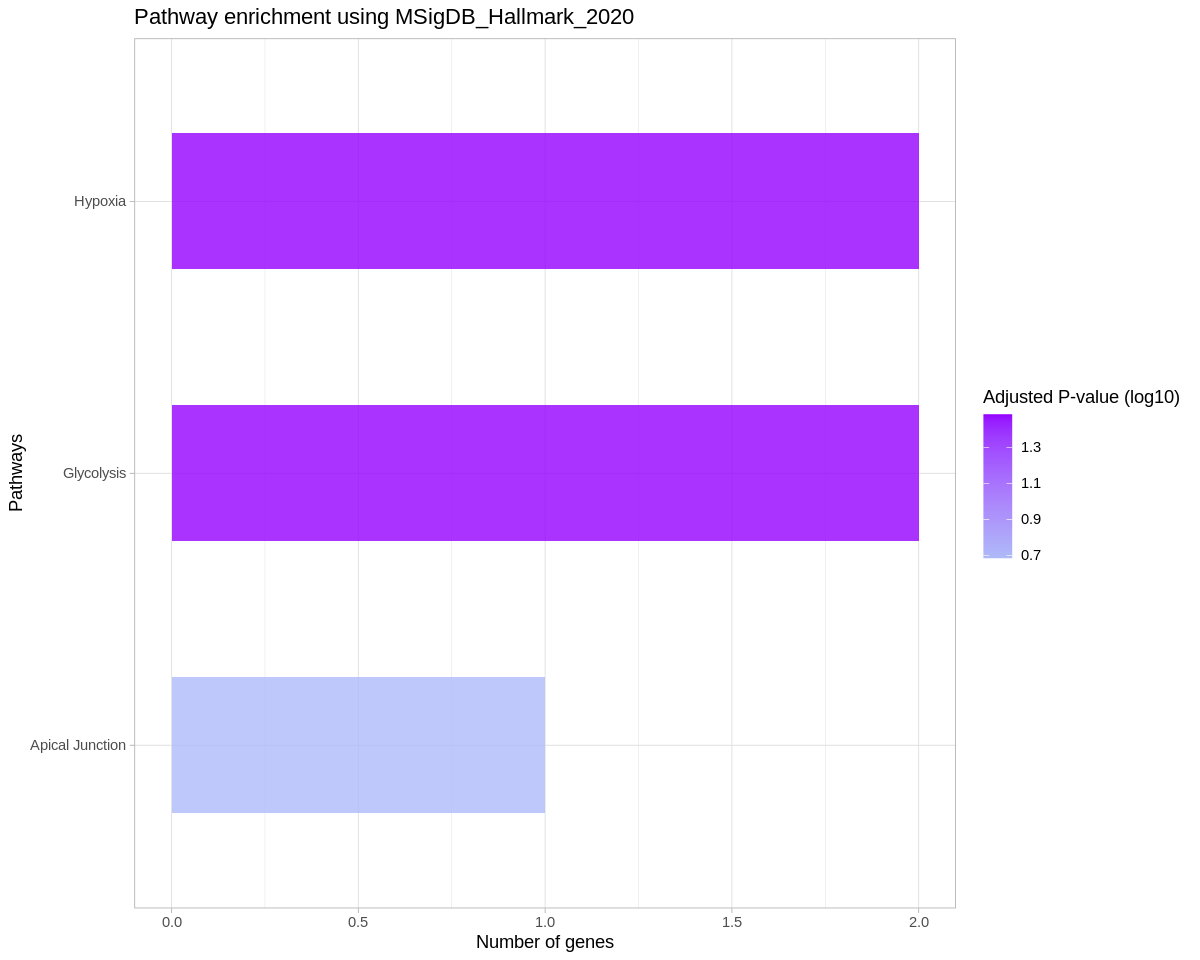

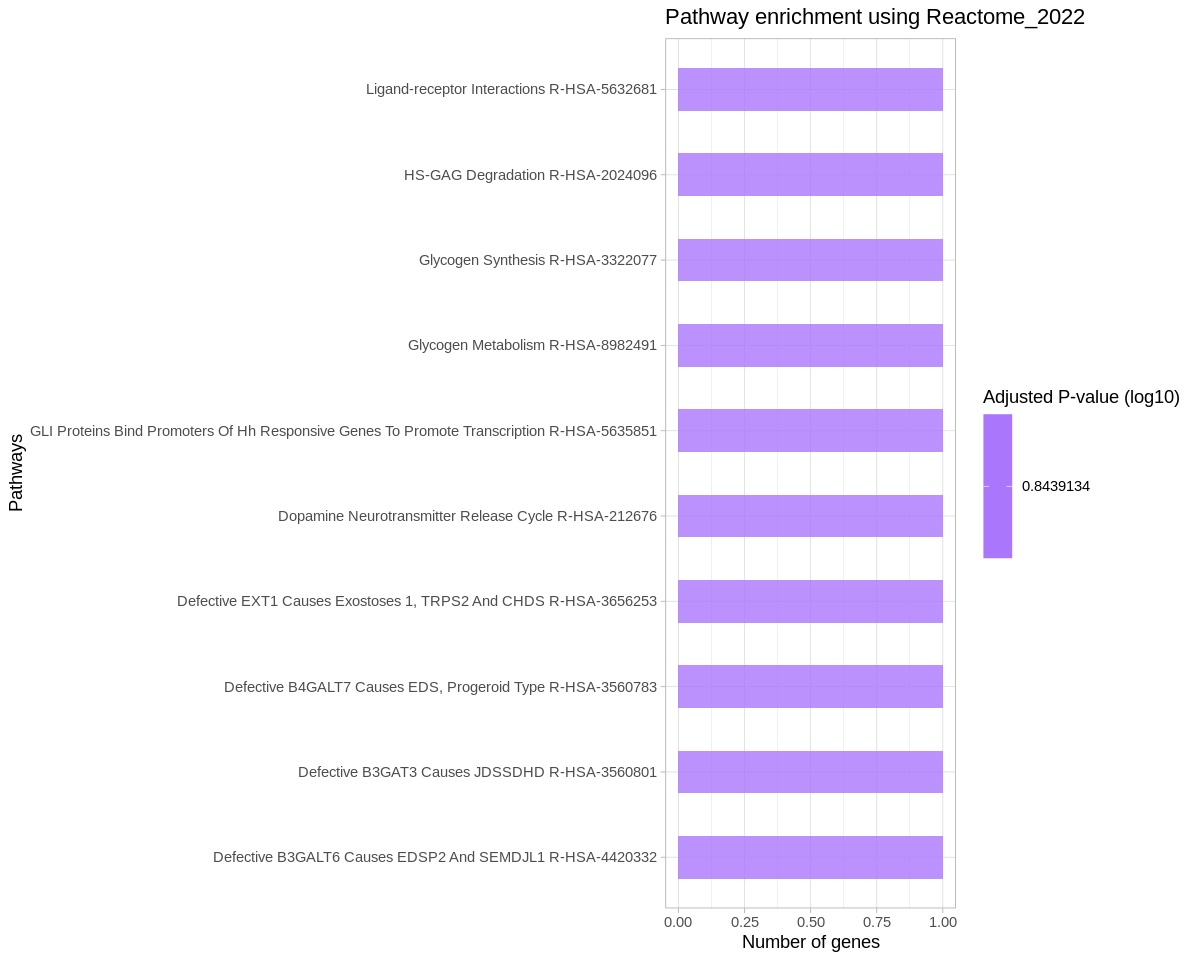

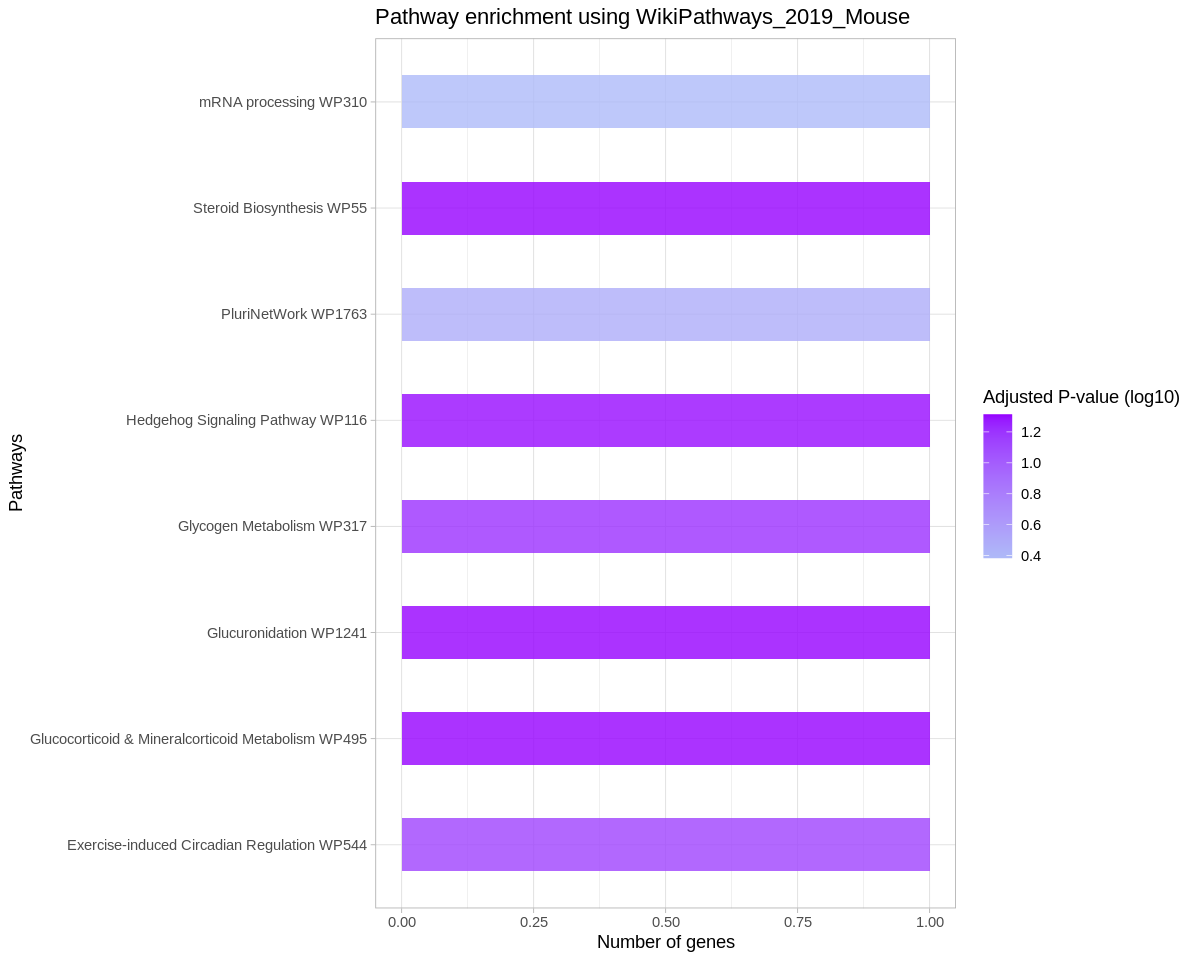

In [80]:
prio_cpa <- prioritized_genes %>% filter(module == "CPA") %>% select(genes)
prio_cpa <- enrichr(prio_cpa$gene, dbs)
for (db in dbs){
    plot <- enrichr_to_plot(prio_cpa, db)
    print(plot)
}

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying Reactome_2022... Done.
  Querying WikiPathways_2019_Mouse... Done.
Parsing results... Done.


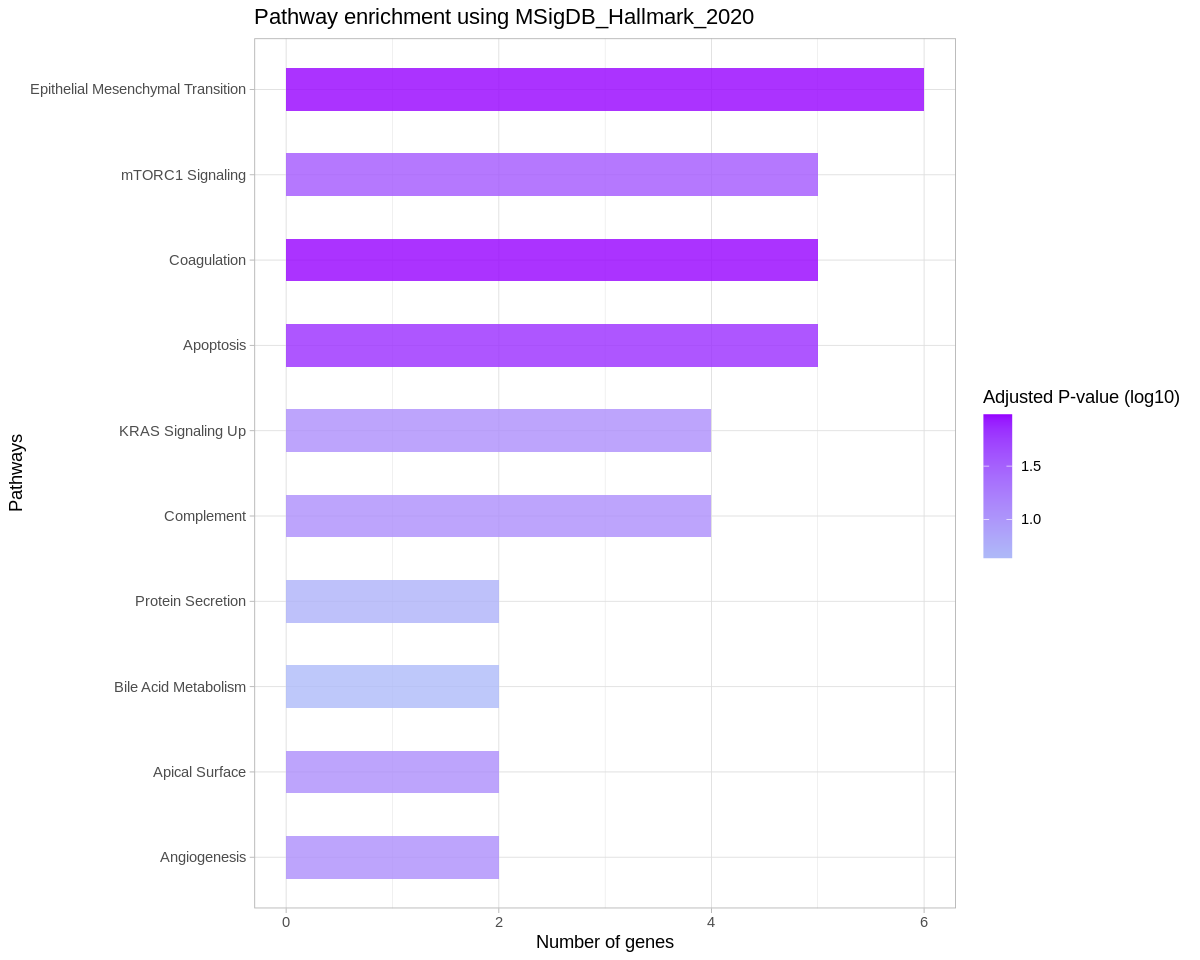

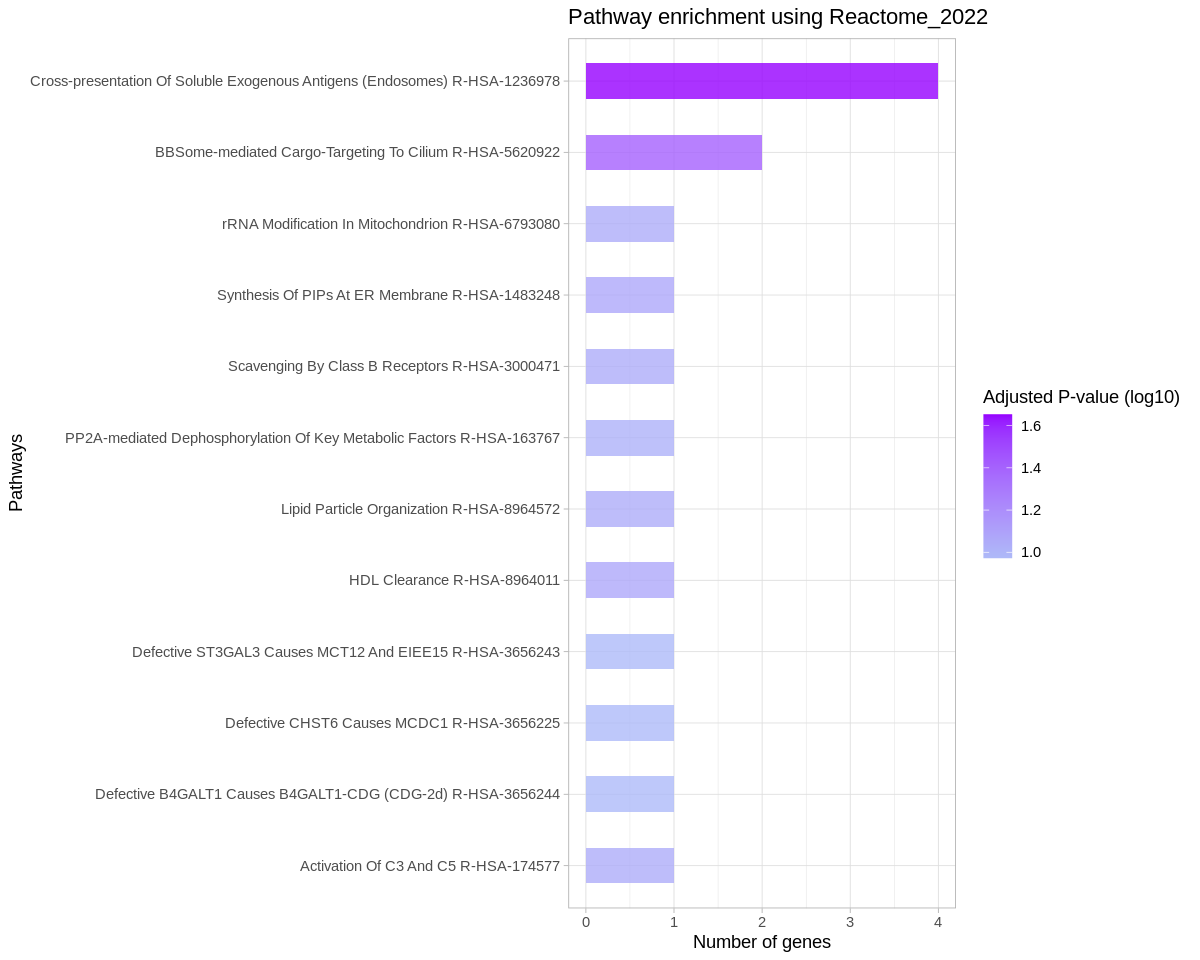

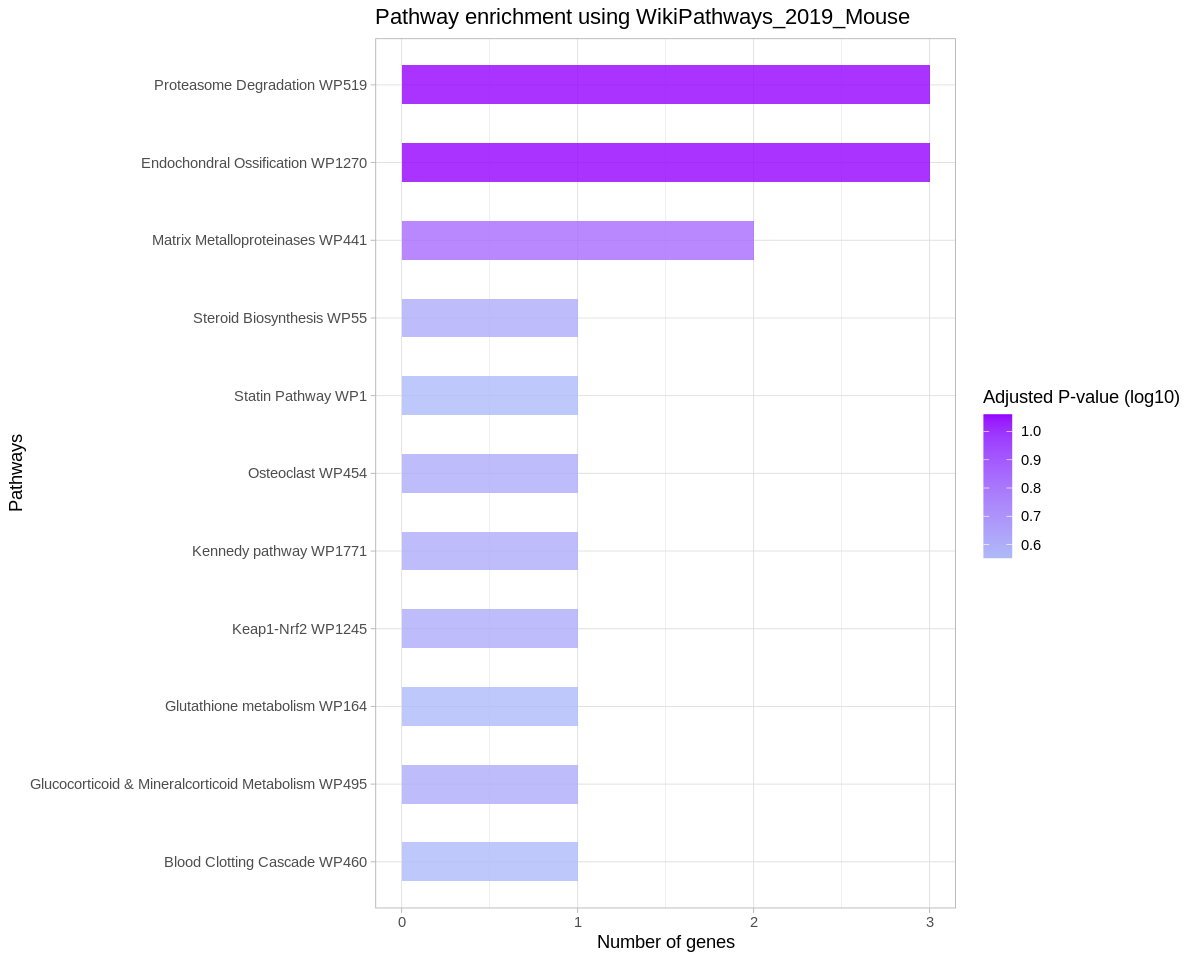

In [81]:
prio_cir <- prioritized_genes %>% filter(module == "Cirrhosis") %>% select(genes)
prio_cir <- enrichr(prio_cir$gene, dbs)
for (db in dbs){
    plot <- enrichr_to_plot(prio_cir, db)
    print(plot)
}

Uploading data to Enrichr... Done.
  Querying MSigDB_Hallmark_2020... Done.
  Querying Reactome_2022... Done.
  Querying WikiPathways_2019_Mouse... Done.
Parsing results... Done.


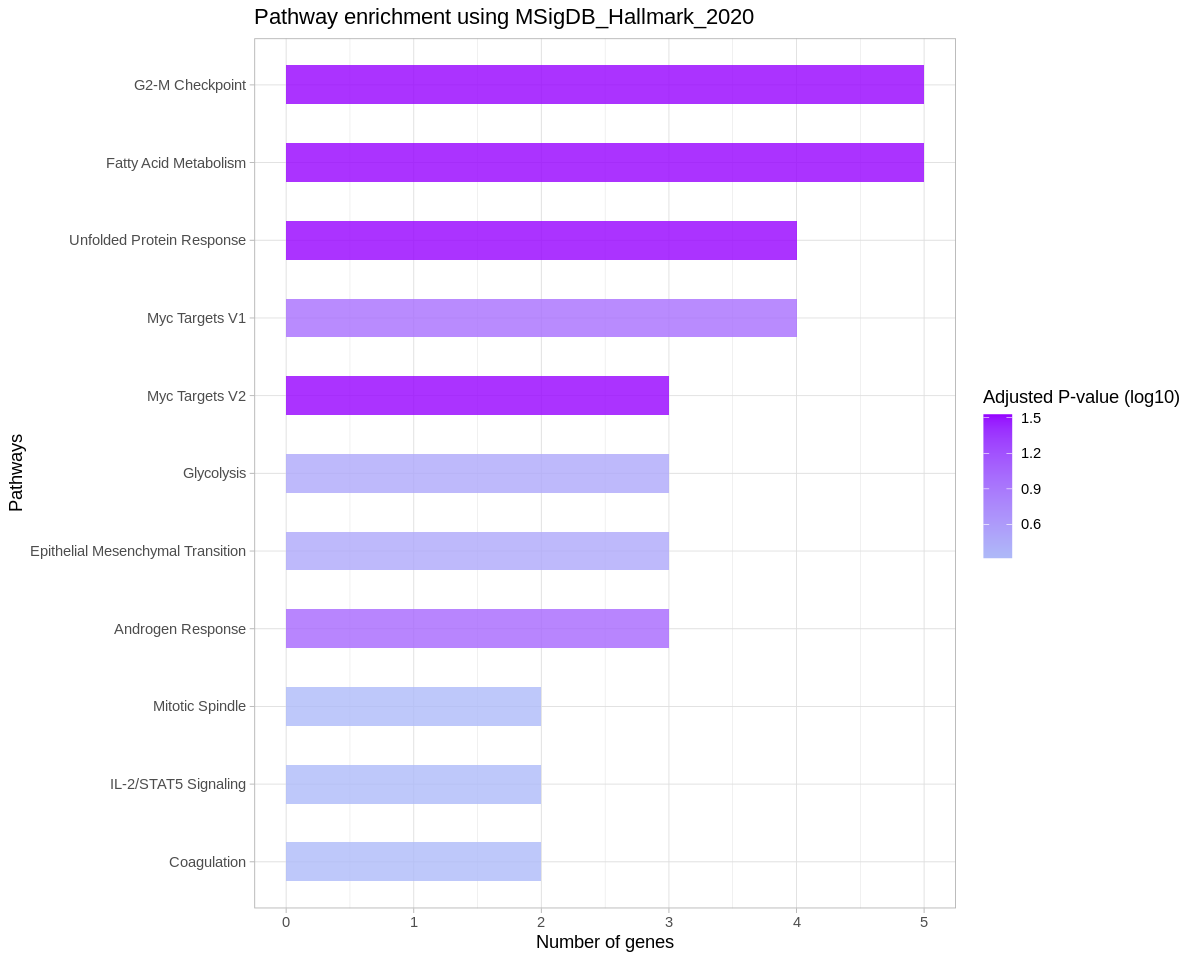

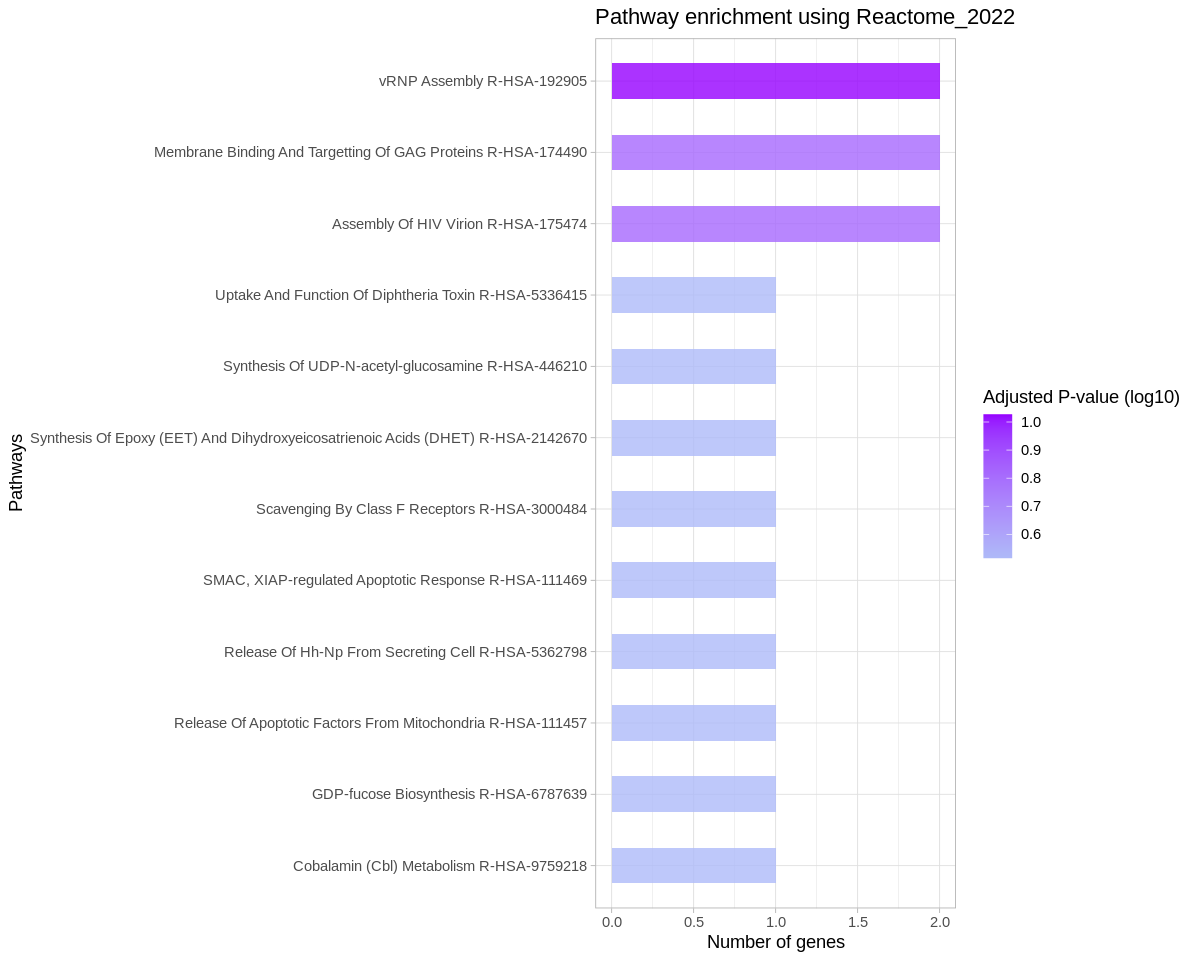

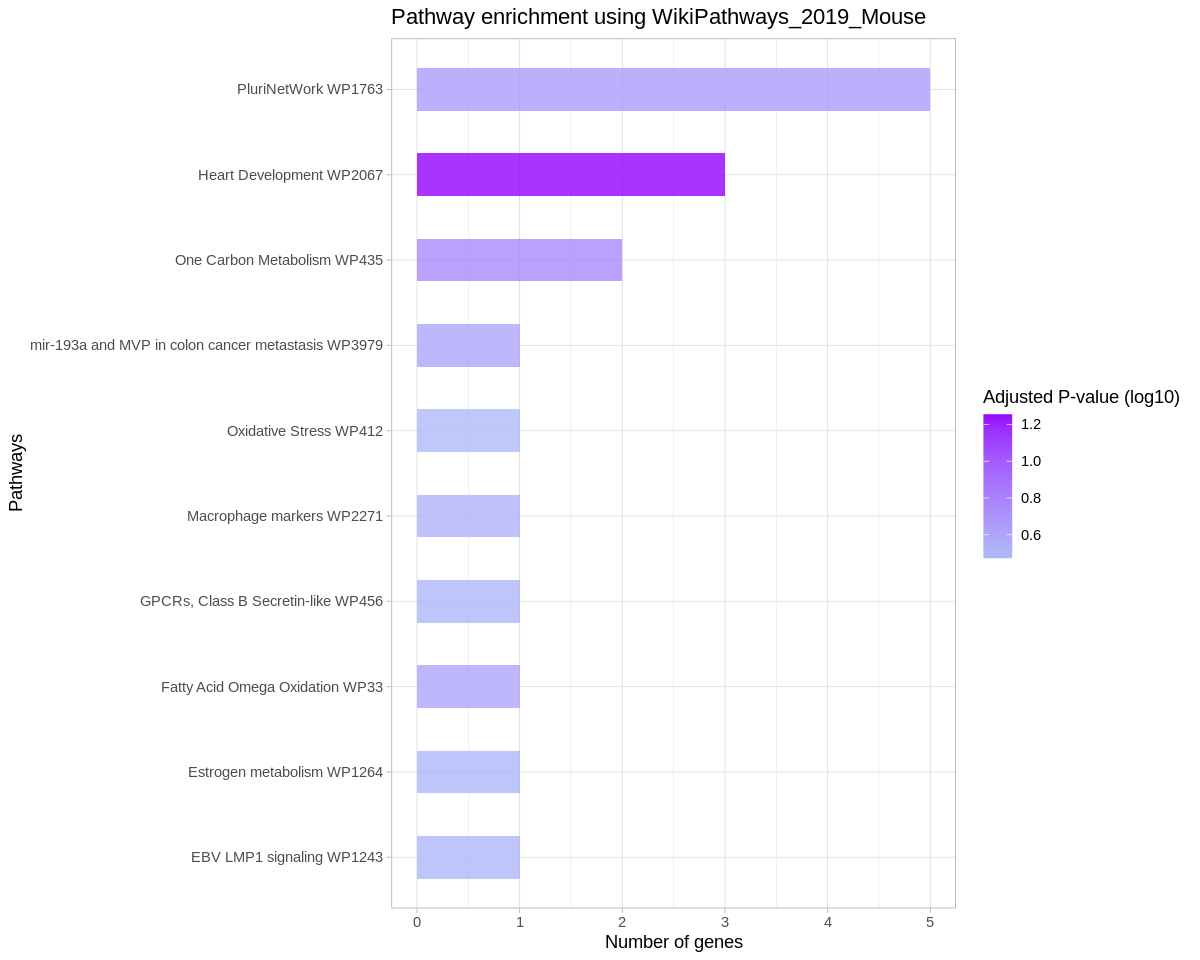

In [82]:
prio_reg <- prioritized_genes %>% filter(module == "Regression") %>% select(genes)
prio_reg <- enrichr(prio_reg$gene, dbs)
for (db in dbs){
    plot <- enrichr_to_plot(prio_reg, db)
    print(plot)
}

## Outputs

In [83]:
write.csv(tmp_df, "03_outputs/08/intersection_genes.csv")


In [22]:
i_pp <- setdiff(i_pp, remove)
i_cpa <- setdiff(i_cpa, remove)
i_cir <- setdiff(i_cir, remove)
i_reg <- setdiff(i_reg, remove)

In [23]:
write.csv(i_pp, "03_outputs/08/intersection_pp_genes.csv")
write.csv(i_cpa, "03_outputs/08/intersection_cpa_genes.csv")
write.csv(i_cir, "03_outputs/08/intersection_cir_genes.csv")
write.csv(i_reg, "03_outputs/08/intersection_reg_genes.csv")